# 1.데이터 불러오기

데이터 출처: 데이콘 주차 수요예측 경진대회 https://dacon.io/competitions/official/235745/overview/description

In [1]:
import os
os.getcwd()

'/content'

### Local에서 불러오기

In [2]:
# from google.colab import files
# uploaded1 = files.upload()

In [3]:
# uploaded2 = files.upload()

In [4]:
# uploaded3 = files.upload()

In [5]:
# train = pd.read_csv(io.StringIO(uploaded1['train.csv'].decode('utf-8')))
# test  = pd.read_csv(io.StringIO(uploaded2['test.csv'].decode('utf-8')))

### Google drive에서 불러오기

#### - 한글 폰트 설정 및 데이터 불러오기

In [6]:
# # font 다운로드 이후 런타임 재시작 해줘야함
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [7]:
import matplotlib.font_manager as fm
fm.findSystemFonts()

['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/l

In [8]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path,size=10).get_name()

In [9]:
font_name

'NanumGothic'

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

plt.rc('font', family=font_name)

train = pd.read_csv('/content/drive/MyDrive/data/parking/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/data/parking/test.csv')

# 2. 데이터 전처리

In [12]:
print(train.shape)

(2952, 15)


In [13]:
print(test.shape)

(1022, 14)


In [14]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

- 임대보증금과 임대료는 '-'을 null로 바꾼 후 float로 타입 변경

In [15]:
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

In [16]:
train.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2.371000e+03,2.362000e+03,2741.000000,2948.000000,2952.000000,2952.000000
mean,886.661247,44.757215,102.747967,12.921070,2.686432e+07,1.957181e+05,0.176578,3.695726,601.668360,559.768293
std,513.540168,31.874280,132.640159,10.778831,2.161391e+07,1.303745e+05,0.427408,2.644665,396.407072,433.375027
min,26.000000,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000
25%,513.500000,32.100000,14.000000,4.000000,1.441800e+07,1.108500e+05,0.000000,2.000000,279.250000,220.000000
50%,779.000000,39.930000,60.000000,11.000000,2.097100e+07,1.612700e+05,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,51.562500,144.000000,20.000000,3.245900e+07,2.365375e+05,0.000000,4.000000,823.000000,770.000000
max,2568.000000,583.400000,1865.000000,55.000000,2.164230e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000


In [17]:
train.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000.0,214270.0,0.0,3.0,1425.0,1015.0
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0


- 값이 같은 데이터들이 있어서 데이터 중복제거를 할까 말까 고민했지만 아파트 단지에서 같은 데이터 값을 가지는 것이 충분히 존재할 수 있다고 판단하고 중복 제거하지 않음.

In [18]:
# 중복제거
# train = train.drop_duplicates()
# test = test.drop_duplicates()

- 결측치 확인을 해보니 임대보증금, 임대료, 지하철 역수, 버스정류장 수에 결측치 존재하여 각각의 데이터들을 확인해보는 것이 필요해보인다.

In [19]:
train.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,581


In [20]:
train[train.임대보증금.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


- 임대보증금은 공급유형과 가장 연관이 있을 것 같아서 확인을 해보았다.

In [21]:
train[train.임대보증금.isnull()].공급유형.value_counts().to_frame()

,공급유형
임대상가,562
국민임대,8
공공분양,7
행복주택,4


In [22]:
train[train.임대보증금.notnull()].공급유형.value_counts().to_frame()

,공급유형
국민임대,1750
행복주택,209
공공임대(10년),205
영구임대,152
공공임대(50년),31
공공임대(분납),12
장기전세,9
공공임대(5년),3


#### 결측치 처리는 나중으로 미뤄놓고 다른 변수들부터 먼저 파생변수들을 생각해보았다.

- 아파트 같은 단지에 공급유형이 임대상가로 분류된 데이터들이 있었는데 임대상가는 실제 아파트 단지들은 아니므로 데이터에서 제거하고 상가가 있었던 단지코드가 1값을 가지는 새로운 더미변수를 추가해주었다.

In [23]:
store = train[train['공급유형']=='임대상가'].단지코드.unique()
train = train[train['공급유형']!='임대상가']

set1 = set(store)
set2 = set(train['단지코드'].unique())
set1 == set1.intersection(set2)

True

In [24]:
store2=[0]*len(train)
for i in range(len(train)):
    if list(train['단지코드'])[i] in list(store):
        store2[i]=1
    else:
        store2[i]=0
store2
train['상가'] = store2

train[train['상가']==1].단지코드.unique()

array(['C1925', 'C1874', 'C2416', 'C2621', 'C1616', 'C1704', 'C2258',
       'C2038', 'C1859', 'C1722', 'C2190', 'C1476', 'C1983', 'C2135',
       'C2034', 'C1109', 'C2289', 'C2597', 'C2310', 'C2132', 'C1439',
       'C1899', 'C1056', 'C2644', 'C1206', 'C1775', 'C1790', 'C2109',
       'C1698', 'C1004', 'C1875', 'C2212', 'C2571'], dtype=object)

- 범주형 변수 별로 등록차량 수에 영향이 있는지 확인

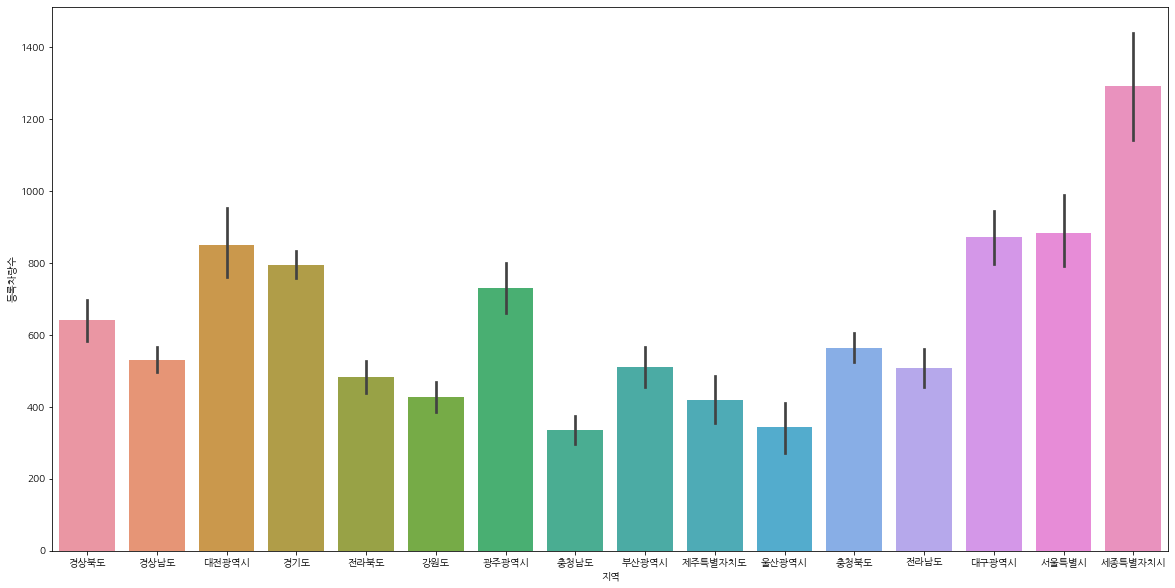

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='지역',y='등록차량수',data=train)
plt.show()

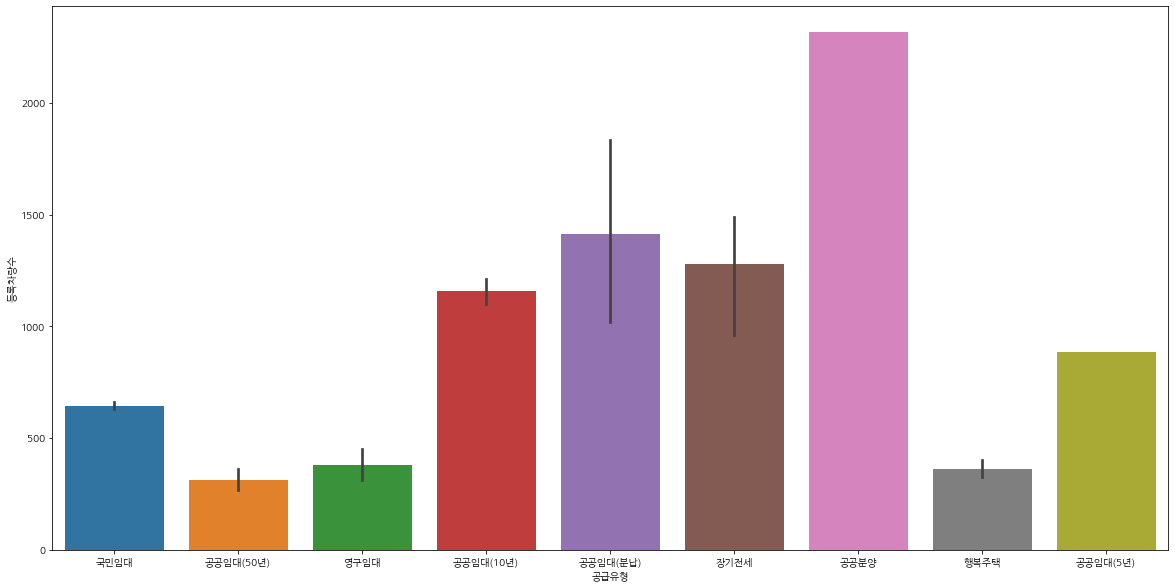

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='공급유형',y='등록차량수',data=train)
plt.show()

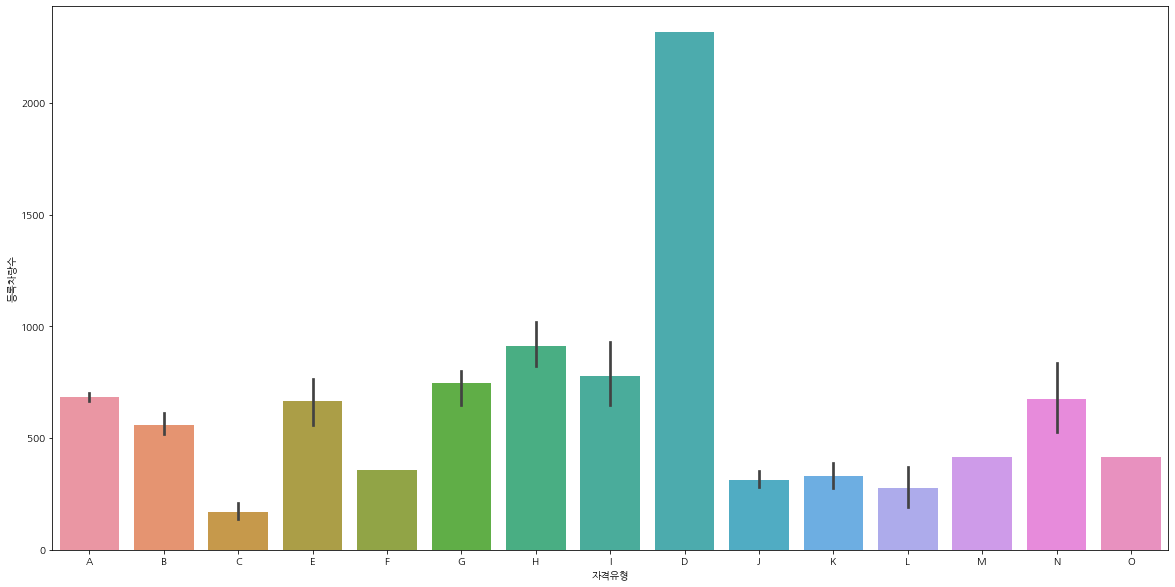

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='자격유형',y='등록차량수',data=train)
plt.show()

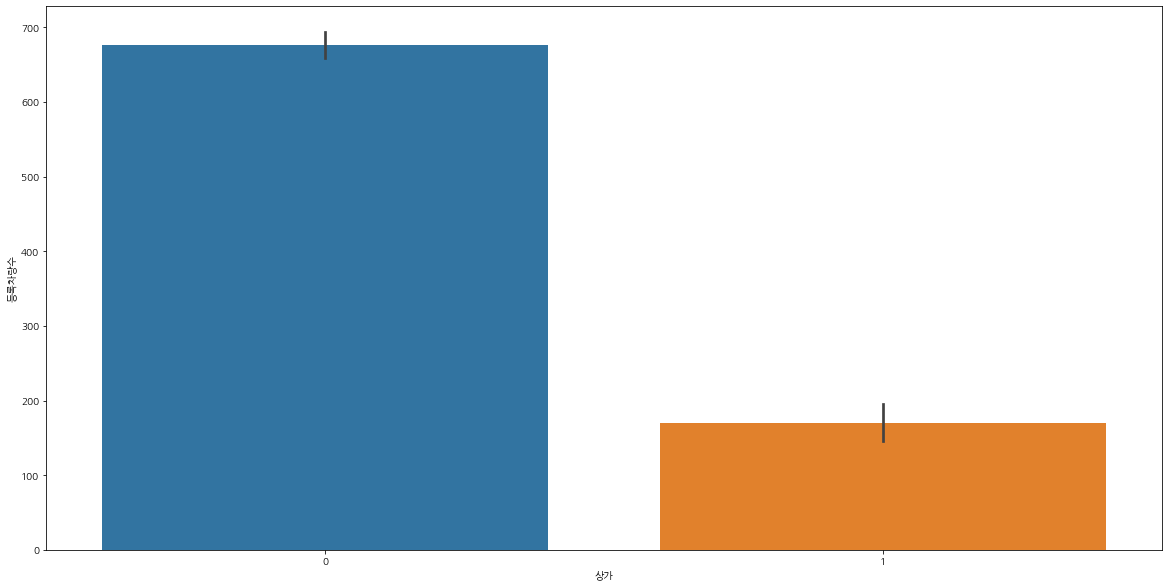

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x='상가',y='등록차량수',data=train)
plt.show()

### 결측치 처리

- 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수 NA -> 0으로 대체

In [29]:
subway_null_codes = train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].단지코드.unique()
train.loc[train.단지코드.isin(subway_null_codes), '도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts(dropna=False)

bus_null_codes = train[train['도보 10분거리 내 버스정류장 수'].isnull()].단지코드.unique()
train.loc[train.단지코드.isin(bus_null_codes), '도보 10분거리 내 버스정류장 수'].value_counts(dropna=False)

cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
train[cols] = train[cols].fillna(0)
test[cols] = test[cols].fillna(0)

- 임대보증금 결측치 처리를 위해 NA 값을 가지는 데이터들을 확인해보았다.

In [30]:
train[train.임대보증금.isnull()].단지코드.unique()

array(['C1350', 'C1326', 'C1786', 'C2186'], dtype=object)

In [31]:
train[train.임대보증금.isnull()].공급유형.value_counts().to_frame()

,공급유형
국민임대,8
공공분양,7
행복주택,4


In [32]:
train[train.임대료.isnull()].공급유형.value_counts().to_frame()

,공급유형
장기전세,9
국민임대,8
공공분양,7
행복주택,4


In [33]:
train[train.임대료.notnull()].공급유형.value_counts().to_frame()

,공급유형
국민임대,1750
행복주택,209
공공임대(10년),205
영구임대,152
공공임대(50년),31
공공임대(분납),12
공공임대(5년),3


In [34]:
train[train.단지코드=='C1350']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,상가
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,0.0,6.0,1636.0,2315.0,0
2338,C1350,1401,아파트,대전광역시,공공임대(10년),51.99,106,2.0,A,28013000.0,408600.0,0.0,6.0,1636.0,2315.0,0
2339,C1350,1401,아파트,대전광역시,공공임대(10년),59.91,13,2.0,A,37474000.0,519350.0,0.0,6.0,1636.0,2315.0,0
2340,C1350,1401,아파트,대전광역시,공공임대(10년),59.92,223,2.0,A,37385000.0,516130.0,0.0,6.0,1636.0,2315.0,0


In [35]:
train[train.단지코드=='C1326']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,상가
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0


In [36]:
train[train.단지코드=='C1786']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,상가
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0
2684,C1786,480,아파트,강원도,행복주택,36.91,92,25.0,J,30560000.0,145160.0,0.0,3.0,338.0,345.0,0


In [37]:
train[train.단지코드=='C2186']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,상가
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0,0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0,0
2908,C2186,924,아파트,대구광역시,국민임대,37.43,220,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0,0
2909,C2186,924,아파트,대구광역시,국민임대,46.51,188,0.0,H,25981000.0,248630.0,0.0,8.0,664.0,744.0,0
2910,C2186,924,아파트,대구광역시,영구임대,26.37,219,0.0,C,13126000.0,105870.0,0.0,8.0,664.0,744.0,0
2911,C2186,924,아파트,대구광역시,영구임대,26.54,13,0.0,C,13164000.0,106190.0,0.0,8.0,664.0,744.0,0


- 공급유형 장기전세인 단지의 임대료는 0으로 만들어줌

In [38]:
indi = np.where(train.공급유형=='장기전세')[0]
indi = indi.tolist()

for i in indi:
    train.iloc[i,10] = 0

- 먼저 범주형 변수들은 더미변수로 만들어줌

In [39]:
train2 = train.drop(['단지코드'],axis=1)
train2 = pd.get_dummies(train2)
train2

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,상가,임대건물구분_아파트,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도,공급유형_공공분양,공급유형_공공임대(10년),공급유형_공공임대(50년),공급유형_공공임대(5년),공급유형_공공임대(분납),공급유형_국민임대,공급유형_영구임대,공급유형_장기전세,공급유형_행복주택,자격유형_A,자격유형_B,자격유형_C,자격유형_D,자격유형_E,자격유형_F,자격유형_G,자격유형_H,자격유형_I,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,자격유형_O
0,900,39.72,134,38.0,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,900,39.72,15,38.0,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,900,51.93,385,38.0,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,900,51.93,15,38.0,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,900,51.93,41,38.0,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,239,49.20,19,7.0,11346000.0,116090.0,0.0,1.0,166.0,146.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2948,239,51.08,34,7.0,14005000.0,142310.0,0.0,1.0,166.0,146.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2949,239,51.73,34,7.0,14005000.0,142310.0,0.0,1.0,166.0,146.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2950,239,51.96,114,7.0,14005000.0,142310.0,0.0,1.0,166.0,146.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- 나머지 NA값을 가지는 임대보증금, 임대료는 다른 변수들을 설명변수로 한 회귀분석을 이용여 결측치를 처리하였다.

In [40]:
y1 = train2.dropna(axis=0)[['임대보증금']]
y2 = train2.dropna(axis=0)[['임대료']]
x1 = train2.drop(['임대보증금','등록차량수'],axis=1).dropna(axis=0).drop(['임대료'],axis=1)
x2 = train2.drop(['임대료','등록차량수'],axis=1).dropna(axis=0)


from sklearn import linear_model
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg_model1 = lin_reg.fit(x1, y1)
y1_pred = lin_reg_model1.predict(train2.drop(['임대보증금','등록차량수','임대료'],axis=1))
len(y1_pred)

train2['임대보증금'] = np.where(train2['임대보증금'].isnull(), 
                           pd.Series(y1_pred.flatten()), train2['임대보증금'])

lin_reg_model2 = lin_reg.fit(x2, y2)
y2_pred = lin_reg_model2.predict(train2.drop(['임대료','등록차량수'],axis=1))

train2['임대료'] = np.where(train2['임대료'].isnull(), 
                           pd.Series(y2_pred.flatten()), train2['임대료'])

train2.isnull().sum().to_frame()

,0
총세대수,0
전용면적,0
전용면적별세대수,0
공가수,0
임대보증금,0
임대료,0
도보 10분거리 내 지하철역 수(환승노선 수 반영),0
도보 10분거리 내 버스정류장 수,0
단지내주차면수,0
등록차량수,0


- test set에도 똑같이 적용을 해주면 되는데 testset에서는 자격유형에도 결측치가 있어서 직접 확인해서 처리해주었다.

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         836 non-null    float64
 10  임대료                           836 non-null    float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  1022 non-null   float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [42]:
test.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,2
임대보증금,186


In [43]:
test[test.자격유형.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [44]:
test[test.단지코드=='C2411']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


In [45]:
test[test.단지코드=='C2253']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,NaN,NaN,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,NaN,NaN,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,NaN,NaN,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0
265,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0
267,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0


In [46]:
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

In [47]:
# 임대상가 데이터 제거
store3 = test[test['공급유형']=='임대상가'].단지코드.unique()
test = test[test['공급유형']!='임대상가']

set1 = set(store3)
set2 = set(test['단지코드'].unique())
set1 == set1.intersection(set2)

# 상가 변수 추가
store4=[0]*len(test)
for i in range(len(test)):
    if list(test['단지코드'])[i] in list(store3):
        store4[i]=1
    else:
        store4[i]=0
store4
test['상가'] = store4

test[test['상가']==1].단지코드.unique()

test2 = test.drop(['단지코드'],axis=1)
test2 = pd.get_dummies(test2)
test2

# 임대보증금, 임대료 회귀분석 이용한 결측치 처리

z1 = test2.dropna(axis=0)[['임대보증금']]
z2 = test2.dropna(axis=0)[['임대료']]
w1 = test2.drop(['임대보증금'],axis=1).dropna(axis=0).drop(['임대료'],axis=1)
w2 = test2.drop(['임대료'],axis=1).dropna(axis=0)


from sklearn import linear_model
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg_model3 = lin_reg.fit(w1, z1)
z1_pred = lin_reg_model3.predict(test2.drop(['임대보증금','임대료'],axis=1))

test2['임대보증금'] = np.where(test2['임대보증금'].isnull(), 
                           pd.Series(z1_pred.flatten()), test2['임대보증금'])

lin_reg_model4 = lin_reg.fit(w2, z2)
z2_pred = lin_reg_model4.predict(test2.drop(['임대료'],axis=1))

test2['임대료'] = np.where(test2['임대료'].isnull(), 
                           pd.Series(z2_pred.flatten()), test2['임대료'])

test2.isnull().sum().to_frame()

,0
총세대수,0
전용면적,0
전용면적별세대수,0
공가수,0
임대보증금,0
임대료,0
도보 10분거리 내 지하철역 수(환승노선 수 반영),0
도보 10분거리 내 버스정류장 수,0
단지내주차면수,0
상가,0


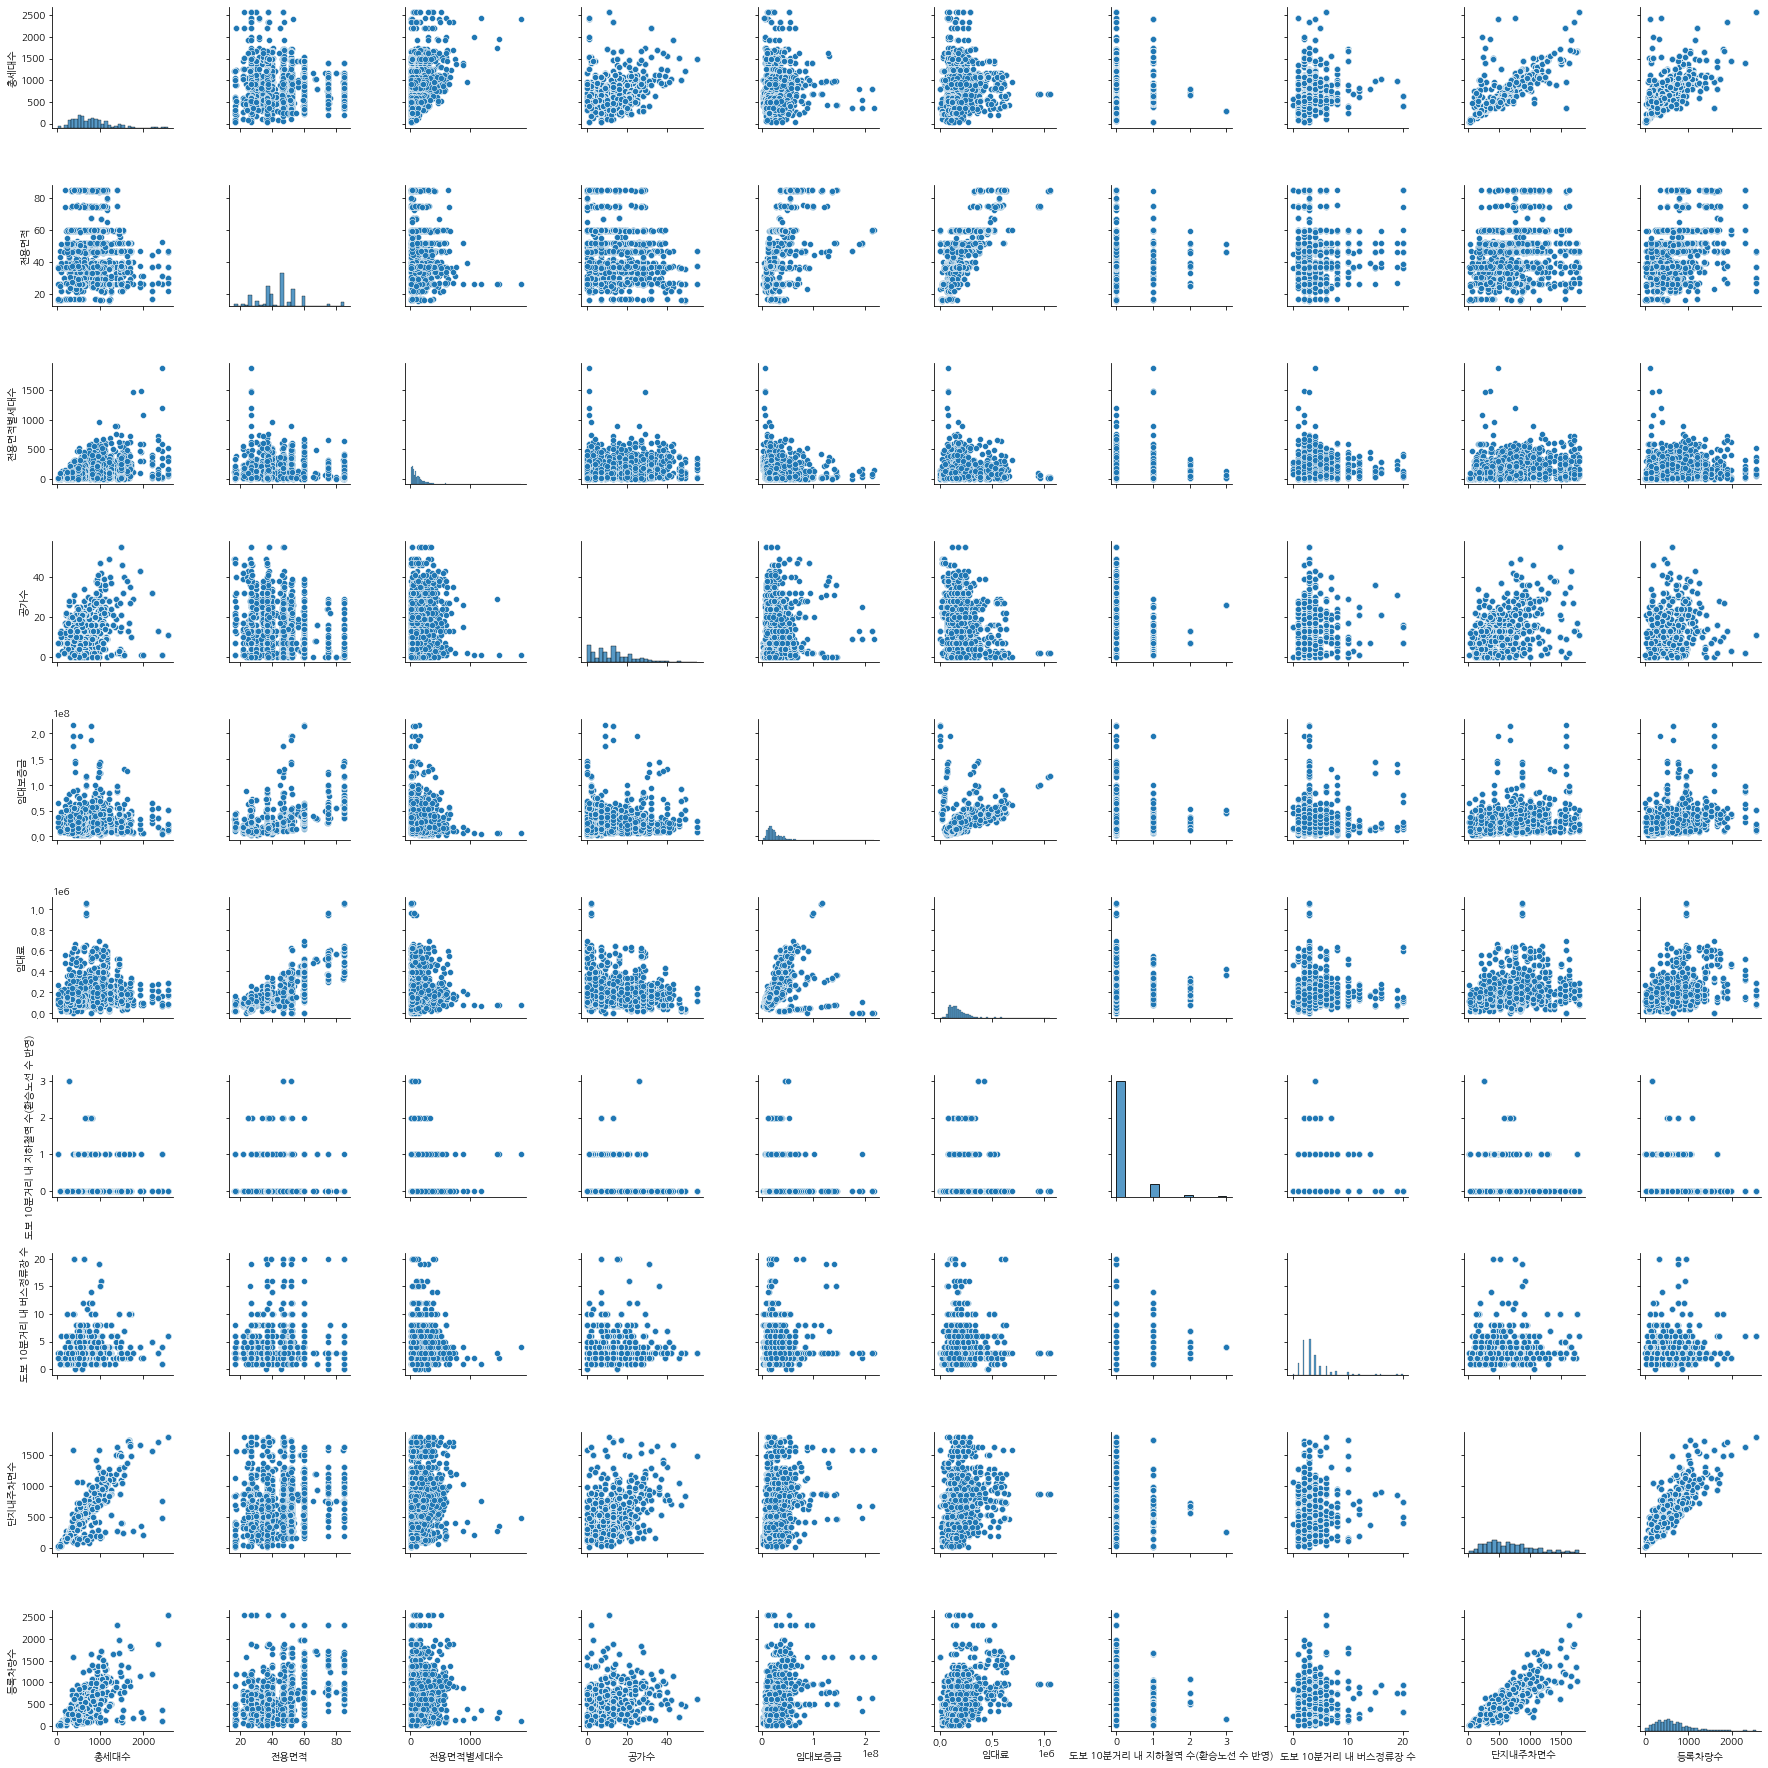

In [48]:
sns.pairplot(train2.iloc[:,0:10])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


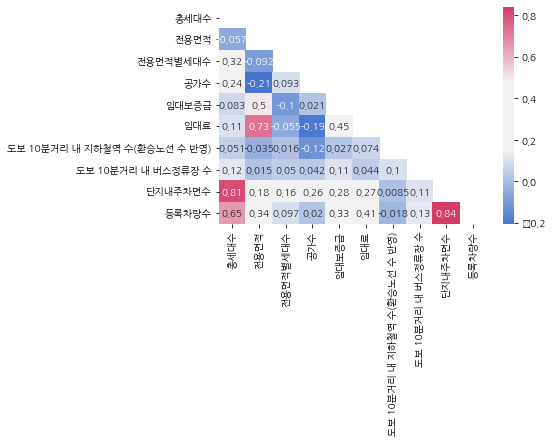

In [49]:
corr = train2.iloc[:,0:10].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)


- 이상치는 boxplot으로 볼 수 있는데, 데이터 성격 상 이상치라고 생각안하고 분석진행


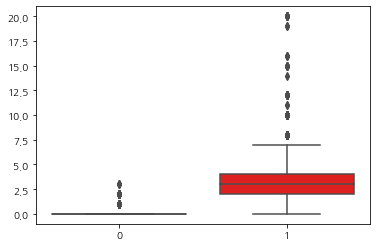

In [50]:
sns.boxplot(data=[train2['도보 10분거리 내 지하철역 수(환승노선 수 반영)'],train2['도보 10분거리 내 버스정류장 수']],color='red')

- 단지코드별로 합쳐서 분석용 training set과 test set을 만들어주었다.

In [51]:

mtrain = train2[['총세대수','공가수','임대보증금','임대료','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수','단지내주차면수','등록차량수']]
mtrain['단지코드'] = train['단지코드']
mtrain
mgtrain = mtrain.groupby('단지코드').mean()


strain = train2.iloc[:,28:]
strain['상가'] = train2['상가']
strain['임대건물구분_아파트'] = train2['임대건물구분_아파트']
strain['전용면적'] = train2['전용면적']
strain['단지코드'] = train['단지코드']
strain
sgtrain = strain.groupby('단지코드').sum()

area = train[['단지코드','지역']]
area = area.drop_duplicates()
train3 = pd.merge(mgtrain,sgtrain,on='단지코드')
train_f = pd.merge(train3,area,how='left',left_on='단지코드',right_on='단지코드')
# %%
age = pd.read_csv('/content/drive/MyDrive/data/parking/age_gender_info.csv')
car_age = age.iloc[:,7:17].sum(axis=1)
car_age = pd.DataFrame(data=car_age,columns=['차인구비율'])
car_age['지역'] = age['지역']
train_final= pd.merge(train_f,car_age,how='left',left_on='지역',right_on='지역')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
mtest = test2[['총세대수','공가수','임대보증금','임대료','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수','단지내주차면수']]
mtest['단지코드'] = test['단지코드']
mtest
mgtest = mtest.groupby('단지코드').mean()

stest = test2.iloc[:,26:]
stest['상가'] = test2['상가']
stest['임대건물구분_아파트'] = test2['임대건물구분_아파트']
stest['전용면적'] = test2['전용면적']
stest['단지코드'] = test['단지코드']
stest
sgtest = stest.groupby('단지코드').sum()

area = test[['단지코드','지역']]
area = area.drop_duplicates()
test3 = pd.merge(mgtest,sgtest,on='단지코드')
test_f = pd.merge(test3,area,how='left',left_on='단지코드',right_on='단지코드')

#
car_age = age.iloc[:,7:17].sum(axis=1)
car_age = pd.DataFrame(data=car_age,columns=['차인구비율'])
car_age['지역'] = age['지역']
test_final= pd.merge(test_f,car_age,how='left',left_on='지역',right_on='지역')

#
test_final['자격유형_F'] = test_final['자격유형_B']=test_final['자격유형_O']=0
test_final['공급유형_공공분양'] = test_final['공급유형_공공임대(5년)'] =test_final['공급유형_장기전세'] =0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


- 분석에 필요없는 변수 제거해주고 설명변수, 반응변수 나눠주기

In [53]:
x_train = train_final.drop(['등록차량수','단지코드','지역'],axis=1)
y_train = train_final['등록차량수']
x_test = test_final.drop(['단지코드','지역'],axis=1)

- 임대보증금, 임대료 변수는 단위가 크므로 log 변환으로 단위 축소 

In [80]:
x_train['임대보증금'] = np.log(x_train['임대보증금'])
x_train['임대료'] = np.log(x_train['임대료'])
x_test['임대보증금'] = np.log(x_test['임대보증금'])
x_test['임대료'] = np.log(x_test['임대료'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



# 3. 데이터 모델링

Randomforest, XGBoost, Lightgbm 을 oputna pacakge를 이용하여 hyperparameter tuning 을 하고 모델링을 적합한 결과값을 스태킹 앙상블을 이용하여 최종 예측값을 도출하였다. 스태킹 앙상블의 최종 모형은 Lasso linear model를 사용하였다.

In [54]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from typing import Dict, Tuple, Union, List
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [55]:
def objectiveRF(trial: Trial, X, y,n_fold):
    params = {
        "n_estimators" : trial.suggest_int('n_estimators', 500, 2000),
        'max_depth':trial.suggest_int('max_depth', 8, 20),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 30),
        'random_state':40
    }
    
    folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    rf_oof = np.zeros((X.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
      
      X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
      y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
      
      model = RandomForestRegressor(**params)
      model.fit(X_train,y_train)

      rf_oof[valid_idx] = model.predict(X_valid)
        
    score = mean_absolute_error(y,rf_oof)

    return score

study_rf = optuna.create_study(direction='minimize',sampler=TPESampler())
study_rf.optimize(lambda trial : objectiveRF(trial, x_train,  y_train,10), n_trials=20)
print('Best trial: score {},\nparams {}'.format(study_rf.best_trial.value,study_rf.best_trial.params))

[I 2021-10-08 10:29:08,251] A new study created in memory with name: no-name-d087f1fa-e99f-4a74-8d57-ca7f502f569d
[I 2021-10-08 10:29:20,618] Trial 0 finished with value: 140.85274409977941 and parameters: {'n_estimators': 620, 'max_depth': 20, 'min_samples_leaf': 15}. Best is trial 0 with value: 140.85274409977941.
[I 2021-10-08 10:29:50,294] Trial 1 finished with value: 141.2174407308047 and parameters: {'n_estimators': 1505, 'max_depth': 15, 'min_samples_leaf': 16}. Best is trial 0 with value: 140.85274409977941.
[I 2021-10-08 10:30:23,835] Trial 2 finished with value: 143.52817366794713 and parameters: {'n_estimators': 1752, 'max_depth': 18, 'min_samples_leaf': 21}. Best is trial 0 with value: 140.85274409977941.
[I 2021-10-08 10:30:52,591] Trial 3 finished with value: 143.82352483019886 and parameters: {'n_estimators': 1509, 'max_depth': 13, 'min_samples_leaf': 22}. Best is trial 0 with value: 140.85274409977941.
[I 2021-10-08 10:31:18,761] Trial 4 finished with value: 132.0075557

Best trial: score 131.75083029432184,
params {'n_estimators': 1705, 'max_depth': 10, 'min_samples_leaf': 5}


In [56]:
best_params_rf = study_rf.best_trial.params
best_params_rf['random_state']=40
best_params_rf

{'max_depth': 10,
 'min_samples_leaf': 5,
 'n_estimators': 1705,
 'random_state': 40}

In [57]:
def kfold_rf(
    params: Dict[str, Union[int, float, str, bool]],
    n_fold: int,
    X: pd.DataFrame,
    y: pd.DataFrame,
    X_test: pd.DataFrame,
) -> Tuple[np.array, np.array]:

    folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    rf_oof = np.zeros((X.shape[0],))
    rf_preds = np.zeros((X_test.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        model = RandomForestRegressor(**params)
        model.fit(X_train,y_train)

        rf_oof[valid_idx] = model.predict(X_valid)
        rf_preds += model.predict(X_test)
        print(f"Mean_absolute_error: {mean_absolute_error(y_valid, rf_oof[valid_idx]):.5f}")
        
    rf_preds = rf_preds/n_fold
    mean_absolute_error_score = mean_absolute_error(y, rf_oof)
    print(f"\n========================\n")
    print(f"Mean_absolute_error Score: {mean_absolute_error_score:.5f}")
    
    return rf_oof, rf_preds

rf_oof, rf_preds = kfold_rf(best_params_rf, 10, x_train, y_train, x_test)

============ Fold 0 ============

Mean_absolute_error: 122.92012
============ Fold 1 ============

Mean_absolute_error: 121.14457
============ Fold 2 ============

Mean_absolute_error: 168.03354
============ Fold 3 ============

Mean_absolute_error: 98.06031
============ Fold 4 ============

Mean_absolute_error: 141.66270
============ Fold 5 ============

Mean_absolute_error: 137.55196
============ Fold 6 ============

Mean_absolute_error: 119.60741
============ Fold 7 ============

Mean_absolute_error: 122.93306
============ Fold 8 ============

Mean_absolute_error: 155.12606
============ Fold 9 ============

Mean_absolute_error: 130.06748


Mean_absolute_error Score: 131.75083


In [58]:
def objectiveXGB(trial: Trial, X, y,n_fold):
    param = {
        "n_estimators" : trial.suggest_int('n_estimators', 500, 2000),
        'max_depth':trial.suggest_int('max_depth', 8, 20),
        'min_child_weight':trial.suggest_int('min_child_weight', 1, 20),
        'gamma':trial.suggest_int('gamma', 0.5, 3),
        'learning_rate': trial.suggest_uniform('learning_rate',0.05,0.3),
        'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.5, 1, 0.1),
        'nthread' : -1,
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0] ),
        'random_state': 40,
        'verbose':0
    }
    folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    
    xgb_oof = np.zeros((X.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = XGBRegressor(**param)
        model.fit(
            X_train,y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100,
        )

        xgb_oof[valid_idx] = model.predict(X_valid)
        
    score = mean_absolute_error(y, xgb_oof)

    return score

study_xgb = optuna.create_study(direction='minimize',sampler=TPESampler())
study_xgb.optimize(lambda trial : objectiveXGB(trial, x_train,  y_train,10), n_trials=50)
print('Best trial: score {},\nparams {}'.format(study_xgb.best_trial.value,study_xgb.best_trial.params))

[I 2021-10-08 10:40:20,880] A new study created in memory with name: no-name-80e2b860-f5e8-4bd5-8191-a4aaa8eea56b


[10:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[0]	validation_0-rmse:657.039	validation_1-rmse:638.931
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:59.905	validation_1-rmse:185.413
Stopping. Best iteration:
[44]	validation_0-rmse:122.424	validation_1-rmse:153.857

[10:40:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:663.361	validation_1-rmse:578.261
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:62.4809	validation_1-rmse:157.748
Stopping. Best iteration:
[80]	validation_0-rmse:75.117	validation_1-rmse:156.144

[10:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:635.72	val

[I 2021-10-08 10:40:54,218] Trial 0 finished with value: 127.48738192835599 and parameters: {'n_estimators': 1023, 'max_depth': 19, 'min_child_weight': 5, 'gamma': 1, 'learning_rate': 0.06272913480149094, 'colsample_bytree': 0.6, 'lambda': 2.613798155223913, 'alpha': 0.5003264925635563, 'subsample': 0.7}. Best is trial 0 with value: 127.48738192835599.


[10:40:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:650.947	validation_1-rmse:632.959
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:115.165	validation_1-rmse:184.08
Stopping. Best iteration:
[31]	validation_0-rmse:177.018	validation_1-rmse:154.875

[10:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:657.52	validation_1-rmse:571.543
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:114.057	validation_1-rmse:150.247
Stopping. Best iteration:
[56]	validation_0-rmse:141.88	validation_1-rmse:142.726

[10:40:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:630.114	validation_1-rmse:808.032
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:101.962	v

[I 2021-10-08 10:41:11,150] Trial 1 finished with value: 128.7415999825119 and parameters: {'n_estimators': 1057, 'max_depth': 9, 'min_child_weight': 17, 'gamma': 2, 'learning_rate': 0.07312347974342927, 'colsample_bytree': 0.9, 'lambda': 0.08770285822896125, 'alpha': 0.011962234000438079, 'subsample': 0.8}. Best is trial 0 with value: 127.48738192835599.


[10:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:525.119	validation_1-rmse:488.125
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:49.2346	validation_1-rmse:215.233
Stopping. Best iteration:
[6]	validation_0-rmse:183.888	validation_1-rmse:170.008

[10:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:525.072	validation_1-rmse:463.364
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:43.7309	validation_1-rmse:171.847
Stopping. Best iteration:
[16]	validation_0-rmse:137.127	validation_1-rmse:148.243

[10:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:506.262	validation_1-rmse:681.648
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:41.4012

[I 2021-10-08 10:41:26,218] Trial 2 finished with value: 134.25151837576647 and parameters: {'n_estimators': 1437, 'max_depth': 19, 'min_child_weight': 15, 'gamma': 2, 'learning_rate': 0.29627573662192946, 'colsample_bytree': 0.9, 'lambda': 0.042865784136985094, 'alpha': 0.14317002183789024, 'subsample': 0.7}. Best is trial 0 with value: 127.48738192835599.


[10:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:655.897	validation_1-rmse:636.429
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:134.652	validation_1-rmse:173.344
Stopping. Best iteration:
[40]	validation_0-rmse:176.873	validation_1-rmse:155.679

[10:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:662.048	validation_1-rmse:576.786
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:134.044	validation_1-rmse:133.359
[200]	validation_0-rmse:102.724	validation_1-rmse:136.365
Stopping. Best iteration:
[127]	validation_0-rmse:123.034	validation_1-rmse:131.39

[10:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:635.666	validation_1-rmse:812.239
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse has

[I 2021-10-08 10:41:42,565] Trial 3 finished with value: 129.16217764275012 and parameters: {'n_estimators': 1369, 'max_depth': 9, 'min_child_weight': 16, 'gamma': 0, 'learning_rate': 0.0660490987792798, 'colsample_bytree': 0.8, 'lambda': 8.934051590336882, 'alpha': 0.2285878407538169, 'subsample': 0.6}. Best is trial 0 with value: 127.48738192835599.


[10:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:518.281	validation_1-rmse:472.54
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:65.7445	validation_1-rmse:186.779
Stopping. Best iteration:
[7]	validation_0-rmse:183.847	validation_1-rmse:170.889

[10:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:525.447	validation_1-rmse:462.806
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:65.1781	validation_1-rmse:156.206
Stopping. Best iteration:
[23]	validation_0-rmse:136.878	validation_1-rmse:132.955

[10:41:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:502.087	validation_1-rmse:672.866
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:53.5841

[I 2021-10-08 10:41:54,753] Trial 4 finished with value: 129.8454858495834 and parameters: {'n_estimators': 677, 'max_depth': 9, 'min_child_weight': 20, 'gamma': 0, 'learning_rate': 0.28962043195071885, 'colsample_bytree': 1.0, 'lambda': 0.013223429918993487, 'alpha': 0.0020789013225770638, 'subsample': 0.7}. Best is trial 0 with value: 127.48738192835599.


[10:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:560.071	validation_1-rmse:536.601
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:53.169	validation_1-rmse:211.999
Stopping. Best iteration:
[16]	validation_0-rmse:143.123	validation_1-rmse:165.647

[10:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:565.853	validation_1-rmse:490.079
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:50.3721	validation_1-rmse:151.962
Stopping. Best iteration:
[32]	validation_0-rmse:107.284	validation_1-rmse:133.523

[10:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:539.45	validation_1-rmse:720.745
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:42.9613	

[I 2021-10-08 10:42:13,306] Trial 5 finished with value: 131.53928557411717 and parameters: {'n_estimators': 544, 'max_depth': 18, 'min_child_weight': 16, 'gamma': 2, 'learning_rate': 0.2301763992033859, 'colsample_bytree': 0.8, 'lambda': 0.006297157951603543, 'alpha': 0.08167080617349197, 'subsample': 0.8}. Best is trial 0 with value: 127.48738192835599.


[10:42:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:616.259	validation_1-rmse:595.928
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:0.224952	validation_1-rmse:175.82
Stopping. Best iteration:
[31]	validation_0-rmse:28.0013	validation_1-rmse:171.845

[10:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:622.852	validation_1-rmse:542.907
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:0.248581	validation_1-rmse:167.3
[200]	validation_0-rmse:0.000897	validation_1-rmse:167.296
Stopping. Best iteration:
[116]	validation_0-rmse:0.092302	validation_1-rmse:167.29

[10:42:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:596.48	validation_1-rmse:780.107
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse has

[I 2021-10-08 10:42:58,458] Trial 6 finished with value: 130.12176097933 and parameters: {'n_estimators': 1391, 'max_depth': 14, 'min_child_weight': 1, 'gamma': 1, 'learning_rate': 0.1273032785830091, 'colsample_bytree': 0.8, 'lambda': 0.0020016463305917017, 'alpha': 0.01929733706635341, 'subsample': 1.0}. Best is trial 0 with value: 127.48738192835599.


[10:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:640.858	validation_1-rmse:623.939
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:87.657	validation_1-rmse:190.385
Stopping. Best iteration:
[26]	validation_0-rmse:165.005	validation_1-rmse:157.967

[10:42:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:647.06	validation_1-rmse:562.926
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:86.8544	validation_1-rmse:153.979
Stopping. Best iteration:
[57]	validation_0-rmse:113.034	validation_1-rmse:140.055

[10:43:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:619.765	validation_1-rmse:798.402
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:76.9354	

[I 2021-10-08 10:43:19,386] Trial 7 finished with value: 127.6628620878179 and parameters: {'n_estimators': 1111, 'max_depth': 8, 'min_child_weight': 13, 'gamma': 2, 'learning_rate': 0.09026260283331085, 'colsample_bytree': 0.9, 'lambda': 9.26526431682744, 'alpha': 1.091136535050647, 'subsample': 0.8}. Best is trial 0 with value: 127.48738192835599.


[10:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:609.414	validation_1-rmse:586.98
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:26.7557	validation_1-rmse:215.05
Stopping. Best iteration:
[14]	validation_0-rmse:151.102	validation_1-rmse:167.904

[10:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:615.899	validation_1-rmse:533.581
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:31.8694	validation_1-rmse:204.403
Stopping. Best iteration:
[20]	validation_0-rmse:112.059	validation_1-rmse:167.02

[10:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:590.108	validation_1-rmse:769.634
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:18.437	v

[I 2021-10-08 10:43:44,712] Trial 8 finished with value: 134.15843635360682 and parameters: {'n_estimators': 978, 'max_depth': 16, 'min_child_weight': 8, 'gamma': 1, 'learning_rate': 0.13958587724883703, 'colsample_bytree': 0.8, 'lambda': 0.21580025632815308, 'alpha': 2.209199003402982, 'subsample': 1.0}. Best is trial 0 with value: 127.48738192835599.


[10:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:609.765	validation_1-rmse:587.514
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:3.8752	validation_1-rmse:165.518
Stopping. Best iteration:
[24]	validation_0-rmse:63.0728	validation_1-rmse:160.606

[10:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:615.207	validation_1-rmse:539.17
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:3.8442	validation_1-rmse:155.777
Stopping. Best iteration:
[45]	validation_0-rmse:26.748	validation_1-rmse:153.206

[10:43:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:589.681	validation_1-rmse:773.821
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:2.07192	va

[I 2021-10-08 10:44:08,038] Trial 9 finished with value: 134.47208062751355 and parameters: {'n_estimators': 536, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0, 'learning_rate': 0.13789648695233453, 'colsample_bytree': 1.0, 'lambda': 0.0022084106102081675, 'alpha': 0.37169236596284805, 'subsample': 0.7}. Best is trial 0 with value: 127.48738192835599.


[10:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:577.505	validation_1-rmse:550.719
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:40.4503	validation_1-rmse:197.227
Stopping. Best iteration:
[13]	validation_0-rmse:150.032	validation_1-rmse:150.591

[10:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:583.167	validation_1-rmse:517.063
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:38.8794	validation_1-rmse:169.959
Stopping. Best iteration:
[21]	validation_0-rmse:120.309	validation_1-rmse:156.266

[10:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:561.631	validation_1-rmse:739.113
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:27.920

[I 2021-10-08 10:44:22,029] Trial 10 finished with value: 131.62026288097914 and parameters: {'n_estimators': 1970, 'max_depth': 13, 'min_child_weight': 7, 'gamma': 1, 'learning_rate': 0.19987925952878596, 'colsample_bytree': 0.5, 'lambda': 0.8140485179759221, 'alpha': 8.565585215866172, 'subsample': 0.6}. Best is trial 0 with value: 127.48738192835599.


[10:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:660.008	validation_1-rmse:644.929
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:100.847	validation_1-rmse:175.252
Stopping. Best iteration:
[44]	validation_0-rmse:152.558	validation_1-rmse:150.155

[10:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:666.331	validation_1-rmse:579.781
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:100.921	validation_1-rmse:162.982
Stopping. Best iteration:
[58]	validation_0-rmse:132.304	validation_1-rmse:162.366

[10:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:638.755	validation_1-rmse:815.971
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:86.318

[I 2021-10-08 10:44:55,705] Trial 11 finished with value: 128.1054093110646 and parameters: {'n_estimators': 988, 'max_depth': 20, 'min_child_weight': 11, 'gamma': 2, 'learning_rate': 0.05730141924793483, 'colsample_bytree': 0.6, 'lambda': 5.6634175478919095, 'alpha': 1.3067741112660132, 'subsample': 0.8}. Best is trial 0 with value: 127.48738192835599.


[10:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:632.836	validation_1-rmse:617.426
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:37.8974	validation_1-rmse:205.228
Stopping. Best iteration:
[24]	validation_0-rmse:131.72	validation_1-rmse:152.619

[10:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:637.529	validation_1-rmse:553.158
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:39.2602	validation_1-rmse:181.443
Stopping. Best iteration:
[32]	validation_0-rmse:101.423	validation_1-rmse:165.243

[10:44:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:611.407	validation_1-rmse:791.795
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:28.0626

[I 2021-10-08 10:45:27,620] Trial 12 finished with value: 127.8187690356099 and parameters: {'n_estimators': 1697, 'max_depth': 12, 'min_child_weight': 6, 'gamma': 2, 'learning_rate': 0.10311188038067762, 'colsample_bytree': 0.6, 'lambda': 1.6598479190534294, 'alpha': 1.1414271084563432, 'subsample': 0.8}. Best is trial 0 with value: 127.48738192835599.


[10:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:640.516	validation_1-rmse:618.43
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:78.7949	validation_1-rmse:177.759
Stopping. Best iteration:
[25]	validation_0-rmse:162.181	validation_1-rmse:148.214

[10:45:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:645.405	validation_1-rmse:563.995
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:78.6949	validation_1-rmse:161.292
Stopping. Best iteration:
[51]	validation_0-rmse:111.808	validation_1-rmse:150.266

[10:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:619.003	validation_1-rmse:798.825
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:65.700

[I 2021-10-08 10:45:46,054] Trial 13 finished with value: 130.42759586451464 and parameters: {'n_estimators': 1163, 'max_depth': 16, 'min_child_weight': 10, 'gamma': 2, 'learning_rate': 0.09268556983641113, 'colsample_bytree': 0.6, 'lambda': 1.7576787050041014, 'alpha': 9.087641688382773, 'subsample': 0.7}. Best is trial 0 with value: 127.48738192835599.


[10:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:597.871	validation_1-rmse:569.278
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:15.8092	validation_1-rmse:204.891
Stopping. Best iteration:
[12]	validation_0-rmse:143.104	validation_1-rmse:169.432

[10:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:601.587	validation_1-rmse:527.402
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:16.9517	validation_1-rmse:186.839
Stopping. Best iteration:
[24]	validation_0-rmse:79.9134	validation_1-rmse:174.024

[10:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:575.821	validation_1-rmse:754.436
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:8.4252

[I 2021-10-08 10:46:04,044] Trial 14 finished with value: 129.17125535969475 and parameters: {'n_estimators': 821, 'max_depth': 11, 'min_child_weight': 4, 'gamma': 1, 'learning_rate': 0.16556559751120375, 'colsample_bytree': 0.7, 'lambda': 0.4799274343295065, 'alpha': 0.7631700797336387, 'subsample': 0.7}. Best is trial 0 with value: 127.48738192835599.


[10:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:633.549	validation_1-rmse:618.391
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:73.8256	validation_1-rmse:189.461
Stopping. Best iteration:
[24]	validation_0-rmse:155.169	validation_1-rmse:153.922

[10:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:639.127	validation_1-rmse:555.995
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:74.3605	validation_1-rmse:155.018
Stopping. Best iteration:
[38]	validation_0-rmse:121.602	validation_1-rmse:145.182

[10:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:612.609	validation_1-rmse:791.476
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:59.700

[I 2021-10-08 10:46:26,763] Trial 15 finished with value: 131.46502350971772 and parameters: {'n_estimators': 806, 'max_depth': 16, 'min_child_weight': 12, 'gamma': 2, 'learning_rate': 0.1026079933913684, 'colsample_bytree': 0.7, 'lambda': 3.35547390101784, 'alpha': 0.043661983217496765, 'subsample': 0.8}. Best is trial 0 with value: 127.48738192835599.


[10:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:662.292	validation_1-rmse:643.994
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:105.093	validation_1-rmse:164.702
Stopping. Best iteration:
[59]	validation_0-rmse:135.662	validation_1-rmse:148.572

[10:46:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:669.26	validation_1-rmse:580.35
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:106.096	validation_1-rmse:162.179
[200]	validation_0-rmse:69.7656	validation_1-rmse:164.37
Stopping. Best iteration:
[125]	validation_0-rmse:95.0359	validation_1-rmse:159.379

[10:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:641.418	validation_1-rmse:820.401
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn'

[I 2021-10-08 10:46:46,838] Trial 16 finished with value: 130.20800544071423 and parameters: {'n_estimators': 1197, 'max_depth': 11, 'min_child_weight': 13, 'gamma': 2, 'learning_rate': 0.0532634393854434, 'colsample_bytree': 0.5, 'lambda': 9.418836948793691, 'alpha': 3.881118145429412, 'subsample': 1.0}. Best is trial 0 with value: 127.48738192835599.


[10:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:593.089	validation_1-rmse:569.404
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:19.7653	validation_1-rmse:230.256
Stopping. Best iteration:
[11]	validation_0-rmse:155.406	validation_1-rmse:170.912

[10:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:598.118	validation_1-rmse:523.652
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:17.4816	validation_1-rmse:164.481
Stopping. Best iteration:
[22]	validation_0-rmse:84.6529	validation_1-rmse:161.784

[10:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:572.884	validation_1-rmse:747.232
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:10.428

[I 2021-10-08 10:47:08,666] Trial 17 finished with value: 128.94579031563256 and parameters: {'n_estimators': 1527, 'max_depth': 18, 'min_child_weight': 4, 'gamma': 2, 'learning_rate': 0.17505656746436662, 'colsample_bytree': 0.9, 'lambda': 0.3405111586745823, 'alpha': 0.44979748081475196, 'subsample': 0.6}. Best is trial 0 with value: 127.48738192835599.


[10:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:642.01	validation_1-rmse:619.884
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:75.0214	validation_1-rmse:183.467
Stopping. Best iteration:
[24]	validation_0-rmse:167.173	validation_1-rmse:150.83

[10:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:647.613	validation_1-rmse:565.296
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:75.253	validation_1-rmse:159.591
Stopping. Best iteration:
[44]	validation_0-rmse:115.97	validation_1-rmse:148.506

[10:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:620.252	validation_1-rmse:798.072
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:62.1551	v

[I 2021-10-08 10:47:26,265] Trial 18 finished with value: 130.3360732689535 and parameters: {'n_estimators': 856, 'max_depth': 14, 'min_child_weight': 9, 'gamma': 1, 'learning_rate': 0.08893908508693411, 'colsample_bytree': 0.7, 'lambda': 2.3332212435400415, 'alpha': 2.917735892443203, 'subsample': 0.7}. Best is trial 0 with value: 127.48738192835599.


[10:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:623.108	validation_1-rmse:607.538
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:24.2721	validation_1-rmse:195.52
Stopping. Best iteration:
[24]	validation_0-rmse:107.657	validation_1-rmse:151.278

[10:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:626.998	validation_1-rmse:543.965
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:27.2009	validation_1-rmse:172.951
Stopping. Best iteration:
[25]	validation_0-rmse:101.738	validation_1-rmse:163.344

[10:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:601.381	validation_1-rmse:782.397
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:17.3251

[I 2021-10-08 10:47:59,735] Trial 19 finished with value: 127.73788379101043 and parameters: {'n_estimators': 1656, 'max_depth': 17, 'min_child_weight': 5, 'gamma': 2, 'learning_rate': 0.12010847964713016, 'colsample_bytree': 0.6, 'lambda': 0.7338907233524686, 'alpha': 0.0026480573612542796, 'subsample': 0.8}. Best is trial 0 with value: 127.48738192835599.


[10:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:554.571	validation_1-rmse:524.05
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:72.8532	validation_1-rmse:197.205
Stopping. Best iteration:
[7]	validation_0-rmse:193.532	validation_1-rmse:163.089

[10:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:556.511	validation_1-rmse:489.804
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:73.6949	validation_1-rmse:167.445
Stopping. Best iteration:
[32]	validation_0-rmse:131.077	validation_1-rmse:137.755

[10:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:537.498	validation_1-rmse:714.808
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:61.8033

[I 2021-10-08 10:48:11,705] Trial 20 finished with value: 128.1017377551284 and parameters: {'n_estimators': 1262, 'max_depth': 8, 'min_child_weight': 19, 'gamma': 0, 'learning_rate': 0.24247390873916597, 'colsample_bytree': 0.9, 'lambda': 0.11731421575206018, 'alpha': 0.06632044973339106, 'subsample': 0.7}. Best is trial 0 with value: 127.48738192835599.


[10:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:626.441	validation_1-rmse:610.894
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:25.6566	validation_1-rmse:202.348
Stopping. Best iteration:
[24]	validation_0-rmse:112.153	validation_1-rmse:155.619

[10:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:630.488	validation_1-rmse:547.036
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:27.4854	validation_1-rmse:165.946
Stopping. Best iteration:
[32]	validation_0-rmse:84.7441	validation_1-rmse:162.769

[10:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:604.722	validation_1-rmse:785.544
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:17.309

[I 2021-10-08 10:48:39,025] Trial 21 finished with value: 127.21382434204679 and parameters: {'n_estimators': 1657, 'max_depth': 17, 'min_child_weight': 5, 'gamma': 2, 'learning_rate': 0.114426633705068, 'colsample_bytree': 0.6, 'lambda': 0.9141661778313215, 'alpha': 0.0013277371118321825, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:645.978	validation_1-rmse:631.875
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:21.3916	validation_1-rmse:187.637
Stopping. Best iteration:
[39]	validation_0-rmse:83.6348	validation_1-rmse:158.497

[10:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:652.067	validation_1-rmse:567.963
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:27.1674	validation_1-rmse:154.548
Stopping. Best iteration:
[63]	validation_0-rmse:49.9993	validation_1-rmse:153.612

[10:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:624.495	validation_1-rmse:804.859
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:19.947

[I 2021-10-08 10:49:58,066] Trial 22 finished with value: 131.96491858299743 and parameters: {'n_estimators': 1902, 'max_depth': 20, 'min_child_weight': 3, 'gamma': 2, 'learning_rate': 0.08113374119651962, 'colsample_bytree': 0.5, 'lambda': 4.119924943626727, 'alpha': 0.0011368629925872246, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:598.883	validation_1-rmse:580.563
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:55.8733	validation_1-rmse:196.672
Stopping. Best iteration:
[16]	validation_0-rmse:153.244	validation_1-rmse:155.052

[10:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:604.32	validation_1-rmse:526.41
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:56.5121	validation_1-rmse:150.117
Stopping. Best iteration:
[35]	validation_0-rmse:106.367	validation_1-rmse:133.948

[10:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:578.219	validation_1-rmse:758.2
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:46.0822	va

[I 2021-10-08 10:50:15,251] Trial 23 finished with value: 127.43363293406529 and parameters: {'n_estimators': 1096, 'max_depth': 18, 'min_child_weight': 13, 'gamma': 2, 'learning_rate': 0.16226087550743307, 'colsample_bytree': 0.7, 'lambda': 1.3359296421030296, 'alpha': 0.01863481014708296, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:601.333	validation_1-rmse:585.932
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:37.4668	validation_1-rmse:188.136
Stopping. Best iteration:
[17]	validation_0-rmse:136.19	validation_1-rmse:150.331

[10:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:605.544	validation_1-rmse:530.748
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:41.4595	validation_1-rmse:183.918
Stopping. Best iteration:
[18]	validation_0-rmse:128.494	validation_1-rmse:164.464

[10:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:580.683	validation_1-rmse:758.76
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:27.3403	

[I 2021-10-08 10:50:32,764] Trial 24 finished with value: 129.9532531294135 and parameters: {'n_estimators': 1762, 'max_depth': 18, 'min_child_weight': 9, 'gamma': 2, 'learning_rate': 0.15709210857644273, 'colsample_bytree': 0.6, 'lambda': 1.1128461288795164, 'alpha': 0.007062292665042196, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:50:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:604.702	validation_1-rmse:588.997
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:26.3287	validation_1-rmse:189.909
Stopping. Best iteration:
[17]	validation_0-rmse:128.227	validation_1-rmse:152.324

[10:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:608.621	validation_1-rmse:528.792
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:32.0664	validation_1-rmse:198.066
Stopping. Best iteration:
[20]	validation_0-rmse:115.492	validation_1-rmse:155.928

[10:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:584.111	validation_1-rmse:763.049
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:20.495

[I 2021-10-08 10:50:53,581] Trial 25 finished with value: 128.25558195722863 and parameters: {'n_estimators': 1283, 'max_depth': 19, 'min_child_weight': 7, 'gamma': 2, 'learning_rate': 0.15120598179188174, 'colsample_bytree': 0.7, 'lambda': 0.33959425737481097, 'alpha': 0.005570459094529934, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:50:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:587.446	validation_1-rmse:565.848
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:10.9486	validation_1-rmse:199.832
Stopping. Best iteration:
[11]	validation_0-rmse:145.196	validation_1-rmse:176.297

[10:50:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:592.405	validation_1-rmse:519.181
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:10.5356	validation_1-rmse:196.553
Stopping. Best iteration:
[16]	validation_0-rmse:103.918	validation_1-rmse:170.365

[10:50:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:567.253	validation_1-rmse:742.547
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:6.4265

[I 2021-10-08 10:51:17,356] Trial 26 finished with value: 133.15384217751506 and parameters: {'n_estimators': 1581, 'max_depth': 17, 'min_child_weight': 3, 'gamma': 1, 'learning_rate': 0.18470791362629455, 'colsample_bytree': 0.6, 'lambda': 0.16278302259314922, 'alpha': 0.018274820195760755, 'subsample': 0.6}. Best is trial 21 with value: 127.21382434204679.


[10:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:624.283	validation_1-rmse:602.405
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:23.3897	validation_1-rmse:211.02
Stopping. Best iteration:
[21]	validation_0-rmse:120.24	validation_1-rmse:169.923

[10:51:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:630.948	validation_1-rmse:548.416
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:24.6307	validation_1-rmse:173.964
Stopping. Best iteration:
[27]	validation_0-rmse:91.7057	validation_1-rmse:165.902

[10:51:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:604.572	validation_1-rmse:784.134
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:16.2282	

[I 2021-10-08 10:51:44,163] Trial 27 finished with value: 132.05550177102958 and parameters: {'n_estimators': 938, 'max_depth': 15, 'min_child_weight': 6, 'gamma': 2, 'learning_rate': 0.114732565776366, 'colsample_bytree': 0.7, 'lambda': 0.05184061254860761, 'alpha': 0.03314479639231621, 'subsample': 1.0}. Best is trial 21 with value: 127.21382434204679.


[10:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:558.363	validation_1-rmse:540.035
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:36.1602	validation_1-rmse:199.161
Stopping. Best iteration:
[15]	validation_0-rmse:127.029	validation_1-rmse:159.696

[10:51:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:562.019	validation_1-rmse:483.166
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:34.7792	validation_1-rmse:179.683
Stopping. Best iteration:
[19]	validation_0-rmse:119.674	validation_1-rmse:151.94

[10:51:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:538.455	validation_1-rmse:725.465
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:24.0937

[I 2021-10-08 10:52:02,029] Trial 28 finished with value: 136.54102247657505 and parameters: {'n_estimators': 1835, 'max_depth': 19, 'min_child_weight': 11, 'gamma': 2, 'learning_rate': 0.23153844999191722, 'colsample_bytree': 0.5, 'lambda': 1.2120288403487152, 'alpha': 0.001073847030057117, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:52:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:574.737	validation_1-rmse:548.529
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:47.1662	validation_1-rmse:189.705
Stopping. Best iteration:
[16]	validation_0-rmse:143.874	validation_1-rmse:153.449

[10:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:578.007	validation_1-rmse:501.905
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:46.7347	validation_1-rmse:149.955
Stopping. Best iteration:
[29]	validation_0-rmse:107.522	validation_1-rmse:136.189

[10:52:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:553.684	validation_1-rmse:733.226
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:40.788

[I 2021-10-08 10:52:16,170] Trial 29 finished with value: 127.39242748503989 and parameters: {'n_estimators': 1039, 'max_depth': 17, 'min_child_weight': 14, 'gamma': 2, 'learning_rate': 0.20510528042793508, 'colsample_bytree': 0.6, 'lambda': 2.5509551469675817, 'alpha': 0.006490032741917619, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:576.407	validation_1-rmse:553.79
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:49.9572	validation_1-rmse:212.863
Stopping. Best iteration:
[10]	validation_0-rmse:173.707	validation_1-rmse:163.959

[10:52:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:582.618	validation_1-rmse:505.381
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:49.6596	validation_1-rmse:146.209
Stopping. Best iteration:
[31]	validation_0-rmse:108.938	validation_1-rmse:130.862

[10:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:556.132	validation_1-rmse:736.835
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:41.562

[I 2021-10-08 10:52:39,374] Trial 30 finished with value: 129.18734173064536 and parameters: {'n_estimators': 1324, 'max_depth': 17, 'min_child_weight': 14, 'gamma': 2, 'learning_rate': 0.20089242060482243, 'colsample_bytree': 0.7, 'lambda': 0.5472684248014424, 'alpha': 0.004514378104162915, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:52:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:573.39	validation_1-rmse:547.054
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:46.2121	validation_1-rmse:191.054
Stopping. Best iteration:
[10]	validation_0-rmse:172.367	validation_1-rmse:164.34

[10:52:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:576.619	validation_1-rmse:500.693
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:47.4579	validation_1-rmse:152.773
Stopping. Best iteration:
[19]	validation_0-rmse:130.566	validation_1-rmse:143.216

[10:52:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:552.342	validation_1-rmse:731.912
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:37.7817

[I 2021-10-08 10:52:54,601] Trial 31 finished with value: 129.18090867207124 and parameters: {'n_estimators': 1072, 'max_depth': 15, 'min_child_weight': 14, 'gamma': 2, 'learning_rate': 0.2074618902993779, 'colsample_bytree': 0.6, 'lambda': 3.4367991988156588, 'alpha': 0.015287289179239254, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:543.221	validation_1-rmse:514.031
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:54.2637	validation_1-rmse:201.709
Stopping. Best iteration:
[7]	validation_0-rmse:185.167	validation_1-rmse:161.11

[10:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:547.133	validation_1-rmse:476.031
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:56.315	validation_1-rmse:165.262
Stopping. Best iteration:
[35]	validation_0-rmse:111.366	validation_1-rmse:143.493

[10:52:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:523.44	validation_1-rmse:716.975
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:43.8969	va

[I 2021-10-08 10:53:09,896] Trial 32 finished with value: 133.33154040758208 and parameters: {'n_estimators': 1080, 'max_depth': 19, 'min_child_weight': 18, 'gamma': 2, 'learning_rate': 0.26154743505168565, 'colsample_bytree': 0.6, 'lambda': 2.4874261666909954, 'alpha': 0.002576640857450352, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:651.708	validation_1-rmse:632.74
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:118.495	validation_1-rmse:166.938
Stopping. Best iteration:
[44]	validation_0-rmse:161.047	validation_1-rmse:141.579

[10:53:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:657.523	validation_1-rmse:571.047
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:117.087	validation_1-rmse:148.54
Stopping. Best iteration:
[70]	validation_0-rmse:134.374	validation_1-rmse:144.839

[10:53:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:630.548	validation_1-rmse:812.118
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:104.679

[I 2021-10-08 10:53:37,122] Trial 33 finished with value: 129.84770009647306 and parameters: {'n_estimators': 699, 'max_depth': 18, 'min_child_weight': 16, 'gamma': 2, 'learning_rate': 0.07227454943526723, 'colsample_bytree': 0.5, 'lambda': 4.45965403166932, 'alpha': 0.007931123006555511, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:587.048	validation_1-rmse:557.561
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:57.6184	validation_1-rmse:208.802
Stopping. Best iteration:
[35]	validation_0-rmse:111.614	validation_1-rmse:170.522

[10:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:591.462	validation_1-rmse:519.444
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:56.9614	validation_1-rmse:158.085
Stopping. Best iteration:
[21]	validation_0-rmse:132.889	validation_1-rmse:139.834

[10:53:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:566.91	validation_1-rmse:749.97
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:46.5392	

[I 2021-10-08 10:53:59,559] Trial 34 finished with value: 128.4569103836168 and parameters: {'n_estimators': 1485, 'max_depth': 20, 'min_child_weight': 12, 'gamma': 2, 'learning_rate': 0.18430423135251772, 'colsample_bytree': 0.7, 'lambda': 1.201024840486244, 'alpha': 0.18662214620012468, 'subsample': 0.7}. Best is trial 21 with value: 127.21382434204679.


[10:53:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:568.142	validation_1-rmse:541.23
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:50.5712	validation_1-rmse:193.841
Stopping. Best iteration:
[16]	validation_0-rmse:142.788	validation_1-rmse:161.535

[10:54:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:571.793	validation_1-rmse:495.888
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:49.4364	validation_1-rmse:151.795
Stopping. Best iteration:
[19]	validation_0-rmse:128.737	validation_1-rmse:140.763

[10:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:547.771	validation_1-rmse:728.704
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:39.417

[I 2021-10-08 10:54:13,878] Trial 35 finished with value: 129.7993420069381 and parameters: {'n_estimators': 919, 'max_depth': 17, 'min_child_weight': 15, 'gamma': 2, 'learning_rate': 0.21667966076373726, 'colsample_bytree': 0.6, 'lambda': 5.842799692633356, 'alpha': 0.003914747907626784, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:544.801	validation_1-rmse:509.41
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:66.7347	validation_1-rmse:186.266
Stopping. Best iteration:
[25]	validation_0-rmse:139.133	validation_1-rmse:144.808

[10:54:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:545.583	validation_1-rmse:483.629
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:68.8452	validation_1-rmse:163.526
Stopping. Best iteration:
[12]	validation_0-rmse:164.813	validation_1-rmse:146.818

[10:54:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:526.01	validation_1-rmse:707.64
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:56.715	v

[I 2021-10-08 10:54:30,680] Trial 36 finished with value: 133.67167496737576 and parameters: {'n_estimators': 1193, 'max_depth': 19, 'min_child_weight': 17, 'gamma': 2, 'learning_rate': 0.26056990434049143, 'colsample_bytree': 0.5, 'lambda': 0.023863536291492425, 'alpha': 0.0015710499214292427, 'subsample': 0.7}. Best is trial 21 with value: 127.21382434204679.


[10:54:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:617.735	validation_1-rmse:598.047
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:9.46934	validation_1-rmse:192.507
Stopping. Best iteration:
[19]	validation_0-rmse:110.927	validation_1-rmse:150.827

[10:54:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:623.254	validation_1-rmse:545.704
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:15.3925	validation_1-rmse:191.267
Stopping. Best iteration:
[32]	validation_0-rmse:63.8762	validation_1-rmse:188.302

[10:54:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:597.052	validation_1-rmse:772.192
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:5.9238

[I 2021-10-08 10:54:56,384] Trial 37 finished with value: 130.4095213509057 and parameters: {'n_estimators': 696, 'max_depth': 15, 'min_child_weight': 2, 'gamma': 1, 'learning_rate': 0.13204470956787606, 'colsample_bytree': 0.8, 'lambda': 0.07502014333935016, 'alpha': 0.027122344139450555, 'subsample': 0.6}. Best is trial 21 with value: 127.21382434204679.


[10:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:602.729	validation_1-rmse:587.333
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:39.6497	validation_1-rmse:194.896
Stopping. Best iteration:
[16]	validation_0-rmse:141.941	validation_1-rmse:146.727

[10:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:606.987	validation_1-rmse:531.931
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:42.8629	validation_1-rmse:188.784
Stopping. Best iteration:
[26]	validation_0-rmse:106.32	validation_1-rmse:169.507

[10:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:582.065	validation_1-rmse:760.122
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:30.0552

[I 2021-10-08 10:55:13,493] Trial 38 finished with value: 130.05103343485658 and parameters: {'n_estimators': 1431, 'max_depth': 18, 'min_child_weight': 9, 'gamma': 2, 'learning_rate': 0.15470139789144796, 'colsample_bytree': 0.6, 'lambda': 2.143637594383565, 'alpha': 0.011126727465216786, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:55:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:655.05	validation_1-rmse:634.773
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:121.223	validation_1-rmse:187.978
Stopping. Best iteration:
[40]	validation_0-rmse:165.246	validation_1-rmse:158.659

[10:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:660.628	validation_1-rmse:575.482
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:118.728	validation_1-rmse:139.087
[200]	validation_0-rmse:83.5094	validation_1-rmse:142.08
Stopping. Best iteration:
[124]	validation_0-rmse:107.946	validation_1-rmse:138.431

[10:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:634.064	validation_1-rmse:810.745
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse has

[I 2021-10-08 10:55:32,135] Trial 39 finished with value: 128.3133467455564 and parameters: {'n_estimators': 1032, 'max_depth': 16, 'min_child_weight': 15, 'gamma': 2, 'learning_rate': 0.06702722822816035, 'colsample_bytree': 0.8, 'lambda': 0.2127605513721478, 'alpha': 0.1341973306451316, 'subsample': 0.7}. Best is trial 21 with value: 127.21382434204679.


[10:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:628.958	validation_1-rmse:609.091
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:64.3882	validation_1-rmse:188.258
Stopping. Best iteration:
[24]	validation_0-rmse:140.213	validation_1-rmse:152.886

[10:55:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:635.352	validation_1-rmse:552.897
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:64.7563	validation_1-rmse:178.953
Stopping. Best iteration:
[29]	validation_0-rmse:127.86	validation_1-rmse:164.83

[10:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:608.628	validation_1-rmse:785.11
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:51.7159	v

[I 2021-10-08 10:55:56,052] Trial 40 finished with value: 130.48605942782498 and parameters: {'n_estimators': 1360, 'max_depth': 17, 'min_child_weight': 13, 'gamma': 0, 'learning_rate': 0.10847187110410755, 'colsample_bytree': 0.7, 'lambda': 0.755244024151583, 'alpha': 0.010717535230158053, 'subsample': 1.0}. Best is trial 21 with value: 127.21382434204679.


[10:55:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:640.916	validation_1-rmse:616.63
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:86.2492	validation_1-rmse:188.55
Stopping. Best iteration:
[25]	validation_0-rmse:170.05	validation_1-rmse:151.421

[10:55:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:647.257	validation_1-rmse:562.611
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:84.9115	validation_1-rmse:155.54
Stopping. Best iteration:
[53]	validation_0-rmse:116.151	validation_1-rmse:145.944

[10:55:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:620.974	validation_1-rmse:800.24
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:73.6933	va

[I 2021-10-08 10:56:18,997] Trial 41 finished with value: 130.5450039405913 and parameters: {'n_estimators': 1143, 'max_depth': 10, 'min_child_weight': 13, 'gamma': 2, 'learning_rate': 0.08564498855558594, 'colsample_bytree': 1.0, 'lambda': 7.228308646230922, 'alpha': 0.3025463161447772, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:56:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:648.876	validation_1-rmse:633.727
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:92.8896	validation_1-rmse:187.45
Stopping. Best iteration:
[30]	validation_0-rmse:160.613	validation_1-rmse:160.583

[10:56:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:654.868	validation_1-rmse:569.485
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:91.675	validation_1-rmse:161.391
Stopping. Best iteration:
[48]	validation_0-rmse:125.385	validation_1-rmse:152.233

[10:56:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:627.766	validation_1-rmse:806.148
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:78.2948	

[I 2021-10-08 10:56:34,106] Trial 42 finished with value: 129.77858322901082 and parameters: {'n_estimators': 1069, 'max_depth': 8, 'min_child_weight': 12, 'gamma': 2, 'learning_rate': 0.0764828598197794, 'colsample_bytree': 0.9, 'lambda': 9.583138585744594, 'alpha': 0.7527741379329864, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:56:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:609.508	validation_1-rmse:588.86
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:65.1975	validation_1-rmse:194.841
Stopping. Best iteration:
[15]	validation_0-rmse:172.247	validation_1-rmse:146.62

[10:56:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:615.939	validation_1-rmse:534.68
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:65.4733	validation_1-rmse:144.188
Stopping. Best iteration:
[22]	validation_0-rmse:139.282	validation_1-rmse:128.137

[10:56:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:588.877	validation_1-rmse:768.511
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:52.2144	

[I 2021-10-08 10:56:48,694] Trial 43 finished with value: 128.3764022394275 and parameters: {'n_estimators': 1124, 'max_depth': 13, 'min_child_weight': 14, 'gamma': 2, 'learning_rate': 0.1437134922861074, 'colsample_bytree': 0.8, 'lambda': 3.208704887982244, 'alpha': 0.05448470482293282, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:56:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:662.543	validation_1-rmse:643.207
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:97.8579	validation_1-rmse:173.812
Stopping. Best iteration:
[45]	validation_0-rmse:154.404	validation_1-rmse:146.324

[10:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:669.142	validation_1-rmse:581.95
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:96.7552	validation_1-rmse:167.096
Stopping. Best iteration:
[80]	validation_0-rmse:108.697	validation_1-rmse:164.257

[10:56:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:641.911	validation_1-rmse:820.265
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:82.747	

[I 2021-10-08 10:57:17,998] Trial 44 finished with value: 132.3897893919167 and parameters: {'n_estimators': 1225, 'max_depth': 14, 'min_child_weight': 10, 'gamma': 2, 'learning_rate': 0.050706959864787536, 'colsample_bytree': 1.0, 'lambda': 1.5195517427836562, 'alpha': 0.09748854148376529, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:637.758	validation_1-rmse:622.396
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:53.8633	validation_1-rmse:202.635
Stopping. Best iteration:
[24]	validation_0-rmse:150.239	validation_1-rmse:154.752

[10:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:642.917	validation_1-rmse:558.546
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:58.7073	validation_1-rmse:174.401
Stopping. Best iteration:
[32]	validation_0-rmse:122.442	validation_1-rmse:157.977

[10:57:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:616.804	validation_1-rmse:794.67
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:42.7519

[I 2021-10-08 10:57:40,518] Trial 45 finished with value: 132.04383652599145 and parameters: {'n_estimators': 1001, 'max_depth': 18, 'min_child_weight': 8, 'gamma': 1, 'learning_rate': 0.09493621632366162, 'colsample_bytree': 0.6, 'lambda': 0.0010118756321392795, 'alpha': 1.398466414455451, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:57:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:620.265	validation_1-rmse:600.327
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:83.0617	validation_1-rmse:196.534
Stopping. Best iteration:
[18]	validation_0-rmse:175.602	validation_1-rmse:160.708

[10:57:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:626.603	validation_1-rmse:543.758
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:84.7968	validation_1-rmse:149.309
Stopping. Best iteration:
[36]	validation_0-rmse:133.129	validation_1-rmse:138.993

[10:57:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:599.266	validation_1-rmse:778.48
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:71.0076

[I 2021-10-08 10:58:18,958] Trial 46 finished with value: 130.66816338974252 and parameters: {'n_estimators': 867, 'max_depth': 20, 'min_child_weight': 16, 'gamma': 2, 'learning_rate': 0.1256732447749048, 'colsample_bytree': 0.7, 'lambda': 6.671239127578112, 'alpha': 0.5389147698078984, 'subsample': 0.8}. Best is trial 21 with value: 127.21382434204679.


[10:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:657.749	validation_1-rmse:637.708
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:104.55	validation_1-rmse:185.747
Stopping. Best iteration:
[40]	validation_0-rmse:160.057	validation_1-rmse:155.636

[10:58:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.022	validation_1-rmse:578.85
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:103.61	validation_1-rmse:150.136
Stopping. Best iteration:
[83]	validation_0-rmse:112.679	validation_1-rmse:147.976

[10:58:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:636.67	validation_1-rmse:815.69
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:87.0158	val

[I 2021-10-08 10:58:43,141] Trial 47 finished with value: 127.2355719582127 and parameters: {'n_estimators': 748, 'max_depth': 19, 'min_child_weight': 11, 'gamma': 2, 'learning_rate': 0.06194474231401083, 'colsample_bytree': 0.8, 'lambda': 0.00778632044364099, 'alpha': 5.015752030817622, 'subsample': 0.7}. Best is trial 21 with value: 127.21382434204679.


[10:58:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:658.3	validation_1-rmse:638.334
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:104.772	validation_1-rmse:187.525
Stopping. Best iteration:
[40]	validation_0-rmse:161.194	validation_1-rmse:154.527

[10:58:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.589	validation_1-rmse:579.312
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:103.62	validation_1-rmse:147.025
Stopping. Best iteration:
[82]	validation_0-rmse:113.104	validation_1-rmse:145.755

[10:58:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:637.214	validation_1-rmse:816.203
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:88.6091

[I 2021-10-08 10:59:06,531] Trial 48 finished with value: 127.48788076991448 and parameters: {'n_estimators': 782, 'max_depth': 19, 'min_child_weight': 11, 'gamma': 2, 'learning_rate': 0.06099881874348726, 'colsample_bytree': 0.8, 'lambda': 0.029213851718275202, 'alpha': 5.929988016636536, 'subsample': 0.7}. Best is trial 21 with value: 127.21382434204679.


[10:59:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:584.965	validation_1-rmse:555.081
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:20.4951	validation_1-rmse:213.261
Stopping. Best iteration:
[10]	validation_0-rmse:153.626	validation_1-rmse:170.648

[10:59:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:588.346	validation_1-rmse:516.866
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:22.3748	validation_1-rmse:177.849
Stopping. Best iteration:
[17]	validation_0-rmse:108.856	validation_1-rmse:157.823

[10:59:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:563.032	validation_1-rmse:742.061
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:12.365

[I 2021-10-08 10:59:32,075] Trial 49 finished with value: 132.04634421598826 and parameters: {'n_estimators': 656, 'max_depth': 20, 'min_child_weight': 6, 'gamma': 2, 'learning_rate': 0.1879310877285191, 'colsample_bytree': 0.8, 'lambda': 0.0077257282137077245, 'alpha': 0.0034417144164784474, 'subsample': 0.7}. Best is trial 21 with value: 127.21382434204679.


Best trial: score 127.21382434204679,
params {'n_estimators': 1657, 'max_depth': 17, 'min_child_weight': 5, 'gamma': 2, 'learning_rate': 0.114426633705068, 'colsample_bytree': 0.6, 'lambda': 0.9141661778313215, 'alpha': 0.0013277371118321825, 'subsample': 0.8}


In [59]:
best_params_xgb = study_xgb.best_trial.params
xgb_p = {'nthread' : -1,
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'random_state': 40,
        'verbose':0}
best_params_xgb.update(xgb_p)
best_params_xgb

{'alpha': 0.0013277371118321825,
 'colsample_bytree': 0.6,
 'gamma': 2,
 'lambda': 0.9141661778313215,
 'learning_rate': 0.114426633705068,
 'max_depth': 17,
 'min_child_weight': 5,
 'n_estimators': 1657,
 'nthread': -1,
 'predictor': 'gpu_predictor',
 'random_state': 40,
 'subsample': 0.8,
 'tree_method': 'gpu_hist',
 'verbose': 0}

In [60]:
from xgboost import XGBRegressor

def kfold_xgb(
    params: Dict[str, Union[int, float, str]],
    n_fold: int,
    X: pd.DataFrame,
    y: pd.DataFrame,
    X_test: pd.DataFrame,
) -> Tuple[np.array, np.array]:

    folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    xgb_oof = np.zeros((X.shape[0],))
    xgb_preds = np.zeros((X_test.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        X_test = X_test[X_train.columns]

        model = XGBRegressor(**params)
        model.fit(
            X_train,y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100,
        )

        xgb_oof[valid_idx] = model.predict(X_valid)
        xgb_preds += model.predict(X_test)
        print(f"Mean_absolute_error: {mean_absolute_error(y_valid, xgb_oof[valid_idx]):.5f}")
    
    xgb_preds = xgb_preds/n_fold
    mean_absolute_error_score = mean_absolute_error(y, xgb_oof)
    print(f"\n========================\n")
    print(f"Mean_absolute_error Score: {mean_absolute_error_score:.5f}")

    return xgb_oof, xgb_preds

xgb_oof, xgb_preds = kfold_xgb(best_params_xgb, 10, x_train, y_train, x_test)

============ Fold 0 ============

[10:59:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:626.441	validation_1-rmse:610.894
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:25.6566	validation_1-rmse:202.348
Stopping. Best iteration:
[24]	validation_0-rmse:112.153	validation_1-rmse:155.619

Mean_absolute_error: 107.45260
============ Fold 1 ============

[10:59:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:630.488	validation_1-rmse:547.036
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:27.4854	validation_1-rmse:165.946
Stopping. Best 

In [61]:
from lightgbm import LGBMRegressor

def objectiveLGB(trial: Trial, X, y,n_fold):
    param = {
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'random_state':40,
        'device':'gpu',
        "n_estimators" : trial.suggest_int('n_estimators', 500, 2000),
        'max_depth': trial.suggest_int('max_depth',3, 20),
        'learning_rate': trial.suggest_uniform("learning_rate", 0.05, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.4,1,0.1),
        'min_data_in_leaf': trial.suggest_int('num_leaves',5,100),
        'feature_fraction': trial.suggest_discrete_uniform('feature_fraction',0.4,1,0.1),
        'bagging_freq':trial.suggest_int('bagging_freq',0,10)
    }
    folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    splits = folds.split(X, y)
    
    xgb_oof = np.zeros((X.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = LGBMRegressor(**param)
        model.fit(
            X_train,y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100,
        )

        xgb_oof[valid_idx] = model.predict(X_valid)
        
    score = mean_absolute_error(y, xgb_oof)

    return score

study_lgb = optuna.create_study(direction='minimize',sampler=TPESampler())
study_lgb.optimize(lambda trial : objectiveXGB(trial, x_train,  y_train,10), n_trials=50)
print('Best trial: score {},\nparams {}'.format(study_lgb.best_trial.value,study_lgb.best_trial.params))

[I 2021-10-08 10:59:59,637] A new study created in memory with name: no-name-0ca8b92a-495b-452c-a34a-1db8476cc2d5


[10:59:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:593.058	validation_1-rmse:569.29
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:27.8888	validation_1-rmse:196.45
Stopping. Best iteration:
[12]	validation_0-rmse:149.965	validation_1-rmse:167.631

[11:00:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:599.743	validation_1-rmse:522.322
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:27.9117	validation_1-rmse:202.084
Stopping. Best iteration:
[14]	validation_0-rmse:133.575	validation_1-rmse:165.821

[11:00:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:574.045	validation_1-rmse:753.665
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:18.9108

[I 2021-10-08 11:00:37,343] Trial 0 finished with value: 133.86457630590346 and parameters: {'n_estimators': 1205, 'max_depth': 18, 'min_child_weight': 9, 'gamma': 2, 'learning_rate': 0.16729705919268612, 'colsample_bytree': 0.6, 'lambda': 0.030242445666753884, 'alpha': 0.001003021943308937, 'subsample': 1.0}. Best is trial 0 with value: 133.86457630590346.


[11:00:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:550.377	validation_1-rmse:535.384
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:29.2023	validation_1-rmse:201.09
Stopping. Best iteration:
[8]	validation_0-rmse:160.163	validation_1-rmse:153.129

[11:00:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:554.015	validation_1-rmse:484.765
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:31.8735	validation_1-rmse:188.217
Stopping. Best iteration:
[17]	validation_0-rmse:115.283	validation_1-rmse:156.605

[11:00:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:530.279	validation_1-rmse:708.52
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:19.8383	v

[I 2021-10-08 11:00:54,380] Trial 1 finished with value: 129.8861973358948 and parameters: {'n_estimators': 615, 'max_depth': 19, 'min_child_weight': 11, 'gamma': 0, 'learning_rate': 0.2449333385471127, 'colsample_bytree': 0.6, 'lambda': 0.007945374719797673, 'alpha': 0.0012519838829539271, 'subsample': 0.8}. Best is trial 1 with value: 129.8861973358948.


[11:00:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:622.81	validation_1-rmse:599.601
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:106.198	validation_1-rmse:173.981
Stopping. Best iteration:
[25]	validation_0-rmse:167.815	validation_1-rmse:158.262

[11:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:628.032	validation_1-rmse:548.671
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:110.141	validation_1-rmse:136.161
Stopping. Best iteration:
[42]	validation_0-rmse:144.938	validation_1-rmse:126.897

[11:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:603.781	validation_1-rmse:779.992
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:91.591

[I 2021-10-08 11:01:08,404] Trial 2 finished with value: 127.04589035719563 and parameters: {'n_estimators': 1015, 'max_depth': 16, 'min_child_weight': 16, 'gamma': 2, 'learning_rate': 0.12388206457684005, 'colsample_bytree': 0.7, 'lambda': 0.5345591697079485, 'alpha': 0.3766527226251086, 'subsample': 0.6}. Best is trial 2 with value: 127.04589035719563.


[11:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:584.55	validation_1-rmse:559.276
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:54.4321	validation_1-rmse:182.637
Stopping. Best iteration:
[17]	validation_0-rmse:147.97	validation_1-rmse:145.066

[11:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:588.118	validation_1-rmse:510.735
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:57.0078	validation_1-rmse:159.183
Stopping. Best iteration:
[22]	validation_0-rmse:137.516	validation_1-rmse:136.91

[11:01:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:563.282	validation_1-rmse:748.321
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:49.3265	

[I 2021-10-08 11:01:23,836] Trial 3 finished with value: 129.04602070621283 and parameters: {'n_estimators': 1936, 'max_depth': 10, 'min_child_weight': 14, 'gamma': 0, 'learning_rate': 0.18796694573213174, 'colsample_bytree': 0.5, 'lambda': 0.005072646119916281, 'alpha': 4.5837645714469035, 'subsample': 0.8}. Best is trial 2 with value: 127.04589035719563.


[11:01:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:600.417	validation_1-rmse:572.987
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:77.2715	validation_1-rmse:199.979
Stopping. Best iteration:
[12]	validation_0-rmse:186.215	validation_1-rmse:163.888

[11:01:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:603.62	validation_1-rmse:528.213
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:76.8543	validation_1-rmse:151.392
Stopping. Best iteration:
[39]	validation_0-rmse:123.584	validation_1-rmse:141.055

[11:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:580.293	validation_1-rmse:756.517
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:68.0432

[I 2021-10-08 11:01:48,262] Trial 4 finished with value: 129.6892318815768 and parameters: {'n_estimators': 584, 'max_depth': 20, 'min_child_weight': 15, 'gamma': 1, 'learning_rate': 0.16214722363224054, 'colsample_bytree': 0.8, 'lambda': 5.690233704336915, 'alpha': 3.4397295900449625, 'subsample': 0.7}. Best is trial 2 with value: 127.04589035719563.


[11:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:582.57	validation_1-rmse:554.996
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:57.225	validation_1-rmse:200.775
Stopping. Best iteration:
[12]	validation_0-rmse:162.422	validation_1-rmse:151.272

[11:01:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:588.613	validation_1-rmse:512.897
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:56.6049	validation_1-rmse:145.105
Stopping. Best iteration:
[52]	validation_0-rmse:86.8108	validation_1-rmse:141.553

[11:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:564.058	validation_1-rmse:740.448
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:50.5106

[I 2021-10-08 11:02:01,941] Trial 5 finished with value: 129.45097498972646 and parameters: {'n_estimators': 1842, 'max_depth': 9, 'min_child_weight': 17, 'gamma': 2, 'learning_rate': 0.1808194615664261, 'colsample_bytree': 1.0, 'lambda': 0.312345047971033, 'alpha': 0.049859105990457064, 'subsample': 1.0}. Best is trial 2 with value: 127.04589035719563.


[11:02:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:609.415	validation_1-rmse:584.827
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:64.7236	validation_1-rmse:195.067
Stopping. Best iteration:
[15]	validation_0-rmse:166.695	validation_1-rmse:155.135

[11:02:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:615.757	validation_1-rmse:536.087
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:64.9658	validation_1-rmse:152.647
Stopping. Best iteration:
[25]	validation_0-rmse:133.892	validation_1-rmse:143.799

[11:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:590.151	validation_1-rmse:766.506
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:55.924

[I 2021-10-08 11:02:25,088] Trial 6 finished with value: 130.68834158714782 and parameters: {'n_estimators': 1047, 'max_depth': 19, 'min_child_weight': 16, 'gamma': 1, 'learning_rate': 0.1369726917493323, 'colsample_bytree': 1.0, 'lambda': 0.30155715221928353, 'alpha': 0.15444618233754182, 'subsample': 1.0}. Best is trial 2 with value: 127.04589035719563.


[11:02:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:559.614	validation_1-rmse:538.929
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:46.7051	validation_1-rmse:191.654
Stopping. Best iteration:
[10]	validation_0-rmse:160.054	validation_1-rmse:152.816

[11:02:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:565.013	validation_1-rmse:493.339
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:43.738	validation_1-rmse:162.937
Stopping. Best iteration:
[20]	validation_0-rmse:122.662	validation_1-rmse:146.727

[11:02:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:539.983	validation_1-rmse:716.895
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:37.8933

[I 2021-10-08 11:02:42,154] Trial 7 finished with value: 129.99117651504264 and parameters: {'n_estimators': 1697, 'max_depth': 17, 'min_child_weight': 17, 'gamma': 1, 'learning_rate': 0.2269402032231529, 'colsample_bytree': 0.8, 'lambda': 0.22533524101237418, 'alpha': 0.05511926638724532, 'subsample': 1.0}. Best is trial 2 with value: 127.04589035719563.


[11:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:532.852	validation_1-rmse:490.375
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:33.9078	validation_1-rmse:206.867
Stopping. Best iteration:
[7]	validation_0-rmse:163.646	validation_1-rmse:147.594

[11:02:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:536.438	validation_1-rmse:469.605
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:32.1299	validation_1-rmse:184.382
Stopping. Best iteration:
[11]	validation_0-rmse:128.601	validation_1-rmse:164.162

[11:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:515.944	validation_1-rmse:700.047
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:23.6292

[I 2021-10-08 11:03:13,163] Trial 8 finished with value: 132.8978094096443 and parameters: {'n_estimators': 1264, 'max_depth': 20, 'min_child_weight': 12, 'gamma': 0, 'learning_rate': 0.2629091850808857, 'colsample_bytree': 1.0, 'lambda': 0.20278103714660176, 'alpha': 0.12440702326992883, 'subsample': 0.8}. Best is trial 2 with value: 127.04589035719563.


[11:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:662.132	validation_1-rmse:645.134
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:101.433	validation_1-rmse:174.073
Stopping. Best iteration:
[43]	validation_0-rmse:154.691	validation_1-rmse:158.147

[11:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:668.926	validation_1-rmse:581.613
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:103.455	validation_1-rmse:161.966
Stopping. Best iteration:
[89]	validation_0-rmse:109.632	validation_1-rmse:159.762

[11:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:641.133	validation_1-rmse:817.726
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:89.421

[I 2021-10-08 11:03:43,997] Trial 9 finished with value: 130.36749602153228 and parameters: {'n_estimators': 1381, 'max_depth': 17, 'min_child_weight': 14, 'gamma': 1, 'learning_rate': 0.053073275119758664, 'colsample_bytree': 0.8, 'lambda': 0.019282052167534876, 'alpha': 0.014806257231462167, 'subsample': 1.0}. Best is trial 2 with value: 127.04589035719563.


[11:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:642.807	validation_1-rmse:624.668
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:29.3252	validation_1-rmse:174.516
Stopping. Best iteration:
[28]	validation_0-rmse:120.444	validation_1-rmse:141.277

[11:03:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:648.852	validation_1-rmse:566.332
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:33.4797	validation_1-rmse:185.948
Stopping. Best iteration:
[35]	validation_0-rmse:98.5133	validation_1-rmse:181.967

[11:03:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:621.929	validation_1-rmse:798.065
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:25.363

[I 2021-10-08 11:04:07,044] Trial 10 finished with value: 129.2944905571904 and parameters: {'n_estimators': 927, 'max_depth': 13, 'min_child_weight': 3, 'gamma': 2, 'learning_rate': 0.08817300053188454, 'colsample_bytree': 0.7, 'lambda': 6.589910284106966, 'alpha': 1.089878209901038, 'subsample': 0.6}. Best is trial 2 with value: 127.04589035719563.


[11:04:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:628.709	validation_1-rmse:605.589
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:127.203	validation_1-rmse:167.054
Stopping. Best iteration:
[33]	validation_0-rmse:171.402	validation_1-rmse:151.981

[11:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:634.721	validation_1-rmse:550.081
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:127.317	validation_1-rmse:143.844
Stopping. Best iteration:
[44]	validation_0-rmse:159.475	validation_1-rmse:135.607

[11:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:610.359	validation_1-rmse:790.374
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:109.21

[I 2021-10-08 11:04:23,161] Trial 11 finished with value: 129.45116475062449 and parameters: {'n_estimators': 1987, 'max_depth': 13, 'min_child_weight': 19, 'gamma': 2, 'learning_rate': 0.11323154376328995, 'colsample_bytree': 0.5, 'lambda': 0.0011473549494325612, 'alpha': 7.540679008639233, 'subsample': 0.6}. Best is trial 2 with value: 127.04589035719563.


[11:04:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:569.759	validation_1-rmse:542.193
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:38.9057	validation_1-rmse:193.006
Stopping. Best iteration:
[10]	validation_0-rmse:165.586	validation_1-rmse:150.485

[11:04:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:575.309	validation_1-rmse:510.95
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:35.445	validation_1-rmse:175.004
Stopping. Best iteration:
[29]	validation_0-rmse:99.1674	validation_1-rmse:152.835

[11:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:554.272	validation_1-rmse:731.81
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:27.5822	v

[I 2021-10-08 11:04:35,962] Trial 12 finished with value: 131.37406166563642 and parameters: {'n_estimators': 1548, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 2, 'learning_rate': 0.21339566915173672, 'colsample_bytree': 0.5, 'lambda': 1.4738318445851128, 'alpha': 0.8868006236386802, 'subsample': 0.6}. Best is trial 2 with value: 127.04589035719563.


[11:04:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:581.066	validation_1-rmse:555.335
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:74.9669	validation_1-rmse:197.01
Stopping. Best iteration:
[14]	validation_0-rmse:168.742	validation_1-rmse:158.719

[11:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:586.88	validation_1-rmse:508.74
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:75.0442	validation_1-rmse:160.15
Stopping. Best iteration:
[30]	validation_0-rmse:134.825	validation_1-rmse:147.556

[11:04:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:560.213	validation_1-rmse:743.66
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:65.0593	val

[I 2021-10-08 11:04:53,711] Trial 13 finished with value: 131.92228819574308 and parameters: {'n_estimators': 798, 'max_depth': 15, 'min_child_weight': 20, 'gamma': 2, 'learning_rate': 0.19480041609016865, 'colsample_bytree': 0.6, 'lambda': 0.0025671023821585304, 'alpha': 0.6958512054586141, 'subsample': 0.8}. Best is trial 2 with value: 127.04589035719563.


[11:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:531.09	validation_1-rmse:494.708
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:40.4736	validation_1-rmse:209.754
Stopping. Best iteration:
[6]	validation_0-rmse:187.868	validation_1-rmse:173.728

[11:04:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:534.131	validation_1-rmse:473.691
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:41.3076	validation_1-rmse:147.577
Stopping. Best iteration:
[32]	validation_0-rmse:93.501	validation_1-rmse:137.744

[11:04:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:511.481	validation_1-rmse:697.749
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:35.3596	

[I 2021-10-08 11:05:07,008] Trial 14 finished with value: 134.39953475753748 and parameters: {'n_estimators': 1520, 'max_depth': 11, 'min_child_weight': 13, 'gamma': 2, 'learning_rate': 0.28349745472009535, 'colsample_bytree': 0.7, 'lambda': 0.046026857220844986, 'alpha': 2.5455535573603494, 'subsample': 0.7}. Best is trial 2 with value: 127.04589035719563.


[11:05:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:621.429	validation_1-rmse:600.917
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:51.7248	validation_1-rmse:194.312
Stopping. Best iteration:
[22]	validation_0-rmse:136.666	validation_1-rmse:160.911

[11:05:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:627.312	validation_1-rmse:549.59
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:50.8119	validation_1-rmse:179.554
Stopping. Best iteration:
[33]	validation_0-rmse:107.253	validation_1-rmse:168.73

[11:05:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:600.795	validation_1-rmse:777.817
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:43.1412	

[I 2021-10-08 11:05:24,462] Trial 15 finished with value: 130.08293307870275 and parameters: {'n_estimators': 1142, 'max_depth': 15, 'min_child_weight': 7, 'gamma': 0, 'learning_rate': 0.12446962205256797, 'colsample_bytree': 0.9, 'lambda': 1.4168105124894284, 'alpha': 0.3865601448845072, 'subsample': 0.6}. Best is trial 2 with value: 127.04589035719563.


[11:05:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:648.435	validation_1-rmse:635.769
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:15.9489	validation_1-rmse:168.728
Stopping. Best iteration:
[40]	validation_0-rmse:79.3955	validation_1-rmse:152.65

[11:05:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:654.455	validation_1-rmse:568.484
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:21.0976	validation_1-rmse:153.834
Stopping. Best iteration:
[72]	validation_0-rmse:34.4819	validation_1-rmse:152.734

[11:05:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:627.249	validation_1-rmse:807.68
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:15.8595	

[I 2021-10-08 11:05:55,394] Trial 16 finished with value: 131.7446425868546 and parameters: {'n_estimators': 828, 'max_depth': 11, 'min_child_weight': 2, 'gamma': 2, 'learning_rate': 0.0763934217236551, 'colsample_bytree': 0.5, 'lambda': 0.005200898661516004, 'alpha': 9.738192025216282, 'subsample': 0.8}. Best is trial 2 with value: 127.04589035719563.


[11:05:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:609.931	validation_1-rmse:585.014
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:64.9922	validation_1-rmse:191.129
Stopping. Best iteration:
[25]	validation_0-rmse:132.774	validation_1-rmse:153.148

[11:05:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:615.484	validation_1-rmse:540.664
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:66.3637	validation_1-rmse:157.692
Stopping. Best iteration:
[38]	validation_0-rmse:111.728	validation_1-rmse:147.093

[11:05:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:588.726	validation_1-rmse:765.323
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:49.984

[I 2021-10-08 11:06:08,695] Trial 17 finished with value: 129.7931776317299 and parameters: {'n_estimators': 1357, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 2, 'learning_rate': 0.14538767690837406, 'colsample_bytree': 0.7, 'lambda': 0.0749161326712608, 'alpha': 2.511166632736546, 'subsample': 0.6}. Best is trial 2 with value: 127.04589035719563.


[11:06:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:630.255	validation_1-rmse:609.31
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:99.7464	validation_1-rmse:181.834
Stopping. Best iteration:
[24]	validation_0-rmse:172.113	validation_1-rmse:146.841

[11:06:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:635.911	validation_1-rmse:552.887
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:103.533	validation_1-rmse:153.803
Stopping. Best iteration:
[38]	validation_0-rmse:146.474	validation_1-rmse:140.32

[11:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:609.329	validation_1-rmse:793.249
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:88.6965

[I 2021-10-08 11:06:26,129] Trial 18 finished with value: 129.5285899024765 and parameters: {'n_estimators': 1028, 'max_depth': 11, 'min_child_weight': 18, 'gamma': 0, 'learning_rate': 0.10920139468518329, 'colsample_bytree': 0.6, 'lambda': 1.6303863461789945, 'alpha': 0.009740014764312462, 'subsample': 0.8}. Best is trial 2 with value: 127.04589035719563.


[11:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:576.641	validation_1-rmse:547.834
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:59.0765	validation_1-rmse:224.307
Stopping. Best iteration:
[10]	validation_0-rmse:174.865	validation_1-rmse:168.753

[11:06:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:580.646	validation_1-rmse:509.86
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:59.6054	validation_1-rmse:145.377
Stopping. Best iteration:
[46]	validation_0-rmse:97.6816	validation_1-rmse:138.03

[11:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:556.572	validation_1-rmse:740.212
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:53.5558	

[I 2021-10-08 11:06:38,656] Trial 19 finished with value: 130.91135576036243 and parameters: {'n_estimators': 1697, 'max_depth': 15, 'min_child_weight': 14, 'gamma': 2, 'learning_rate': 0.20267356168550288, 'colsample_bytree': 0.9, 'lambda': 0.013421889203410864, 'alpha': 0.21678842615548277, 'subsample': 0.7}. Best is trial 2 with value: 127.04589035719563.


[11:06:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:606.507	validation_1-rmse:582.583
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:114.344	validation_1-rmse:169.035
Stopping. Best iteration:
[17]	validation_0-rmse:190.581	validation_1-rmse:145.047

[11:06:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:608.715	validation_1-rmse:525.83
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:115.216	validation_1-rmse:143.708
Stopping. Best iteration:
[38]	validation_0-rmse:153.295	validation_1-rmse:134.905

[11:06:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:586.948	validation_1-rmse:768.07
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:100.128	

[I 2021-10-08 11:06:51,715] Trial 20 finished with value: 130.41334859473767 and parameters: {'n_estimators': 1514, 'max_depth': 13, 'min_child_weight': 20, 'gamma': 2, 'learning_rate': 0.15659641837422406, 'colsample_bytree': 0.5, 'lambda': 0.5437516121629398, 'alpha': 0.3529562360817167, 'subsample': 0.6}. Best is trial 2 with value: 127.04589035719563.


[11:06:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:643.067	validation_1-rmse:626.184
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:13.5988	validation_1-rmse:177.002
Stopping. Best iteration:
[28]	validation_0-rmse:111.49	validation_1-rmse:159.135

[11:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:649.419	validation_1-rmse:566.981
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:14.3166	validation_1-rmse:184.297
Stopping. Best iteration:
[79]	validation_0-rmse:23.0518	validation_1-rmse:183.928

[11:06:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:622.307	validation_1-rmse:798.648
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:12.3528

[I 2021-10-08 11:07:29,949] Trial 21 finished with value: 131.0136721816187 and parameters: {'n_estimators': 941, 'max_depth': 13, 'min_child_weight': 1, 'gamma': 2, 'learning_rate': 0.087516205254439, 'colsample_bytree': 0.7, 'lambda': 6.479716950928276, 'alpha': 1.187445897250995, 'subsample': 0.6}. Best is trial 2 with value: 127.04589035719563.


[11:07:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:643.843	validation_1-rmse:625.764
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:31.2726	validation_1-rmse:174.084
Stopping. Best iteration:
[32]	validation_0-rmse:110.568	validation_1-rmse:144.047

[11:07:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:649.911	validation_1-rmse:567.2
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:36.4719	validation_1-rmse:181.616
Stopping. Best iteration:
[43]	validation_0-rmse:82.5465	validation_1-rmse:178.948

[11:07:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:622.95	validation_1-rmse:799.103
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:26.9381	v

[I 2021-10-08 11:07:57,520] Trial 22 finished with value: 126.64842685401862 and parameters: {'n_estimators': 765, 'max_depth': 12, 'min_child_weight': 3, 'gamma': 2, 'learning_rate': 0.0863812725697023, 'colsample_bytree': 0.7, 'lambda': 2.6658768058316316, 'alpha': 1.513698288398214, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.512	validation_1-rmse:647.188
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:96.7078	validation_1-rmse:165.67
Stopping. Best iteration:
[60]	validation_0-rmse:130.951	validation_1-rmse:149.894

[11:07:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:671.245	validation_1-rmse:584.608
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:97.4579	validation_1-rmse:150.482
Stopping. Best iteration:
[86]	validation_0-rmse:105.971	validation_1-rmse:149.53

[11:08:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:643.721	validation_1-rmse:819.96
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:83.9046	v

[I 2021-10-08 11:08:17,358] Trial 23 finished with value: 128.00910335567826 and parameters: {'n_estimators': 731, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 2, 'learning_rate': 0.05036542893398597, 'colsample_bytree': 0.6, 'lambda': 2.488446067853375, 'alpha': 4.389568312750712, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:08:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:657.683	validation_1-rmse:639.916
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:70.6704	validation_1-rmse:171.509
Stopping. Best iteration:
[53]	validation_0-rmse:114.378	validation_1-rmse:149.098

[11:08:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.321	validation_1-rmse:578.742
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:74.3567	validation_1-rmse:167.82
Stopping. Best iteration:
[65]	validation_0-rmse:98.2608	validation_1-rmse:164.083

[11:08:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:636.953	validation_1-rmse:812.868
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:62.916	

[I 2021-10-08 11:08:39,374] Trial 24 finished with value: 127.7863623977553 and parameters: {'n_estimators': 704, 'max_depth': 12, 'min_child_weight': 5, 'gamma': 2, 'learning_rate': 0.06204766418059485, 'colsample_bytree': 0.6, 'lambda': 2.6138914239035724, 'alpha': 2.4220426722645265, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:08:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:651.534	validation_1-rmse:632.894
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:50.7222	validation_1-rmse:184.304
Stopping. Best iteration:
[34]	validation_0-rmse:133.449	validation_1-rmse:150.548

[11:08:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:657.839	validation_1-rmse:573.219
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:53.9891	validation_1-rmse:168.796
Stopping. Best iteration:
[60]	validation_0-rmse:81.3061	validation_1-rmse:165.869

[11:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:630.519	validation_1-rmse:806.386
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:43.580

[I 2021-10-08 11:09:08,307] Trial 25 finished with value: 131.1197292427081 and parameters: {'n_estimators': 693, 'max_depth': 14, 'min_child_weight': 4, 'gamma': 2, 'learning_rate': 0.07321869047216817, 'colsample_bytree': 0.7, 'lambda': 0.6359984986455939, 'alpha': 1.7749342490541584, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:636.376	validation_1-rmse:616.604
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:47.7552	validation_1-rmse:192.384
Stopping. Best iteration:
[25]	validation_0-rmse:136.791	validation_1-rmse:153.999

[11:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:642.831	validation_1-rmse:560.763
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:46.4737	validation_1-rmse:177.596
Stopping. Best iteration:
[33]	validation_0-rmse:108.164	validation_1-rmse:168.886

[11:09:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:616.115	validation_1-rmse:791.462
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:38.902

[I 2021-10-08 11:09:28,267] Trial 26 finished with value: 129.37337013226593 and parameters: {'n_estimators': 505, 'max_depth': 12, 'min_child_weight': 5, 'gamma': 2, 'learning_rate': 0.09866774729753164, 'colsample_bytree': 0.8, 'lambda': 3.3125605740256185, 'alpha': 0.4687369421114014, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:09:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:654.49	validation_1-rmse:636.267
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:54.0092	validation_1-rmse:178.856
Stopping. Best iteration:
[40]	validation_0-rmse:124.521	validation_1-rmse:149.788

[11:09:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:660.994	validation_1-rmse:575.705
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:59.2629	validation_1-rmse:175.333
Stopping. Best iteration:
[98]	validation_0-rmse:60.3928	validation_1-rmse:174.568

[11:09:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:633.452	validation_1-rmse:809.395
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:46.532

[I 2021-10-08 11:09:54,662] Trial 27 finished with value: 128.66987296030032 and parameters: {'n_estimators': 851, 'max_depth': 16, 'min_child_weight': 4, 'gamma': 2, 'learning_rate': 0.06807660473743125, 'colsample_bytree': 0.6, 'lambda': 0.619494556373332, 'alpha': 0.06178576600458649, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:09:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:618.672	validation_1-rmse:594.773
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:65.6611	validation_1-rmse:189.716
Stopping. Best iteration:
[19]	validation_0-rmse:155.122	validation_1-rmse:153.519

[11:09:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:624.403	validation_1-rmse:547.795
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:68.047	validation_1-rmse:158.221
Stopping. Best iteration:
[38]	validation_0-rmse:114.019	validation_1-rmse:149.122

[11:09:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:597.435	validation_1-rmse:774.048
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:53.4683

[I 2021-10-08 11:10:10,815] Trial 28 finished with value: 129.1107735329486 and parameters: {'n_estimators': 685, 'max_depth': 14, 'min_child_weight': 9, 'gamma': 2, 'learning_rate': 0.13013418513031175, 'colsample_bytree': 0.7, 'lambda': 9.246607473330165, 'alpha': 1.2988766309045143, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:630.623	validation_1-rmse:610.544
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:8.28521	validation_1-rmse:195.171
Stopping. Best iteration:
[21]	validation_0-rmse:118.105	validation_1-rmse:178.256

[11:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:636.349	validation_1-rmse:556.325
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:8.44679	validation_1-rmse:154.383
Stopping. Best iteration:
[89]	validation_0-rmse:11.0089	validation_1-rmse:153.884

[11:10:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:609.708	validation_1-rmse:785.851
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:6.2128

[I 2021-10-08 11:10:44,041] Trial 29 finished with value: 129.85523422728193 and parameters: {'n_estimators': 1130, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 2, 'learning_rate': 0.1097382800865523, 'colsample_bytree': 0.9, 'lambda': 3.178790741934179, 'alpha': 0.2510919659100151, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:657.178	validation_1-rmse:639.384
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:91.0522	validation_1-rmse:171.479
Stopping. Best iteration:
[54]	validation_0-rmse:128.361	validation_1-rmse:149.648

[11:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.015	validation_1-rmse:579.196
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:92.0373	validation_1-rmse:159.991
Stopping. Best iteration:
[82]	validation_0-rmse:102.361	validation_1-rmse:156.886

[11:10:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:636.187	validation_1-rmse:812.928
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:79.013

[I 2021-10-08 11:11:06,538] Trial 30 finished with value: 127.74830772634375 and parameters: {'n_estimators': 996, 'max_depth': 16, 'min_child_weight': 7, 'gamma': 2, 'learning_rate': 0.06288618485110116, 'colsample_bytree': 0.6, 'lambda': 0.11314540058852757, 'alpha': 0.6190523642233334, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:11:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:657.068	validation_1-rmse:639.266
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:91.1517	validation_1-rmse:172.596
Stopping. Best iteration:
[51]	validation_0-rmse:131.729	validation_1-rmse:149.054

[11:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:663.904	validation_1-rmse:579.106
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:91.8477	validation_1-rmse:162.486
Stopping. Best iteration:
[81]	validation_0-rmse:102.311	validation_1-rmse:156.389

[11:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:636.079	validation_1-rmse:812.819
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:77.355

[I 2021-10-08 11:11:28,833] Trial 31 finished with value: 127.12204278896323 and parameters: {'n_estimators': 954, 'max_depth': 17, 'min_child_weight': 7, 'gamma': 2, 'learning_rate': 0.06307427471135763, 'colsample_bytree': 0.6, 'lambda': 0.10056820004047017, 'alpha': 0.5284225178630731, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:11:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:642.878	validation_1-rmse:624.05
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:83.567	validation_1-rmse:182.129
Stopping. Best iteration:
[27]	validation_0-rmse:164.427	validation_1-rmse:146.425

[11:11:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:649.464	validation_1-rmse:567.461
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:80.2745	validation_1-rmse:158.674
Stopping. Best iteration:
[44]	validation_0-rmse:122.923	validation_1-rmse:153.597

[11:11:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:621.846	validation_1-rmse:798.525
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:67.5434

[I 2021-10-08 11:11:50,074] Trial 32 finished with value: 129.55074556499508 and parameters: {'n_estimators': 995, 'max_depth': 17, 'min_child_weight': 8, 'gamma': 2, 'learning_rate': 0.08757338626005504, 'colsample_bytree': 0.6, 'lambda': 0.08794165617691226, 'alpha': 0.5899875379005501, 'subsample': 0.6}. Best is trial 22 with value: 126.64842685401862.


[11:11:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:637.924	validation_1-rmse:616.356
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:87.1178	validation_1-rmse:185.529
Stopping. Best iteration:
[24]	validation_0-rmse:166.874	validation_1-rmse:146.509

[11:11:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:643.957	validation_1-rmse:563.429
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:89.5484	validation_1-rmse:150.909
Stopping. Best iteration:
[44]	validation_0-rmse:127.34	validation_1-rmse:145.273

[11:11:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:617.307	validation_1-rmse:796.762
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:75.2024

[I 2021-10-08 11:12:05,755] Trial 33 finished with value: 124.36036094142472 and parameters: {'n_estimators': 1185, 'max_depth': 16, 'min_child_weight': 10, 'gamma': 2, 'learning_rate': 0.0968180156696535, 'colsample_bytree': 0.7, 'lambda': 0.14400278456661214, 'alpha': 0.24635198048011106, 'subsample': 0.6}. Best is trial 33 with value: 124.36036094142472.


[11:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:635.638	validation_1-rmse:612.61
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:73.7677	validation_1-rmse:175.627
Stopping. Best iteration:
[24]	validation_0-rmse:156.58	validation_1-rmse:145.583

[11:12:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:641.314	validation_1-rmse:560.296
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:74.1461	validation_1-rmse:159.455
Stopping. Best iteration:
[51]	validation_0-rmse:109.641	validation_1-rmse:151.166

[11:12:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:614.793	validation_1-rmse:795.106
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:59.9273

[I 2021-10-08 11:12:23,591] Trial 34 finished with value: 130.22112375173725 and parameters: {'n_estimators': 1227, 'max_depth': 18, 'min_child_weight': 10, 'gamma': 2, 'learning_rate': 0.0999464589412622, 'colsample_bytree': 0.7, 'lambda': 0.1406742933537725, 'alpha': 0.027680630772245533, 'subsample': 0.7}. Best is trial 33 with value: 124.36036094142472.


[11:12:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:606.972	validation_1-rmse:583.274
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:71.7087	validation_1-rmse:194.964
Stopping. Best iteration:
[17]	validation_0-rmse:162.222	validation_1-rmse:160.602

[11:12:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:612.365	validation_1-rmse:538.17
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:68.473	validation_1-rmse:138.325
Stopping. Best iteration:
[51]	validation_0-rmse:102.046	validation_1-rmse:132.841

[11:12:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:588.978	validation_1-rmse:765.554
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:62.2792	

[I 2021-10-08 11:12:49,653] Trial 35 finished with value: 132.7116279241323 and parameters: {'n_estimators': 1096, 'max_depth': 18, 'min_child_weight': 11, 'gamma': 2, 'learning_rate': 0.15073046379538502, 'colsample_bytree': 0.8, 'lambda': 0.03691074448202585, 'alpha': 0.0039054676825118627, 'subsample': 0.6}. Best is trial 33 with value: 124.36036094142472.


[11:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:625.305	validation_1-rmse:603.441
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:89.1483	validation_1-rmse:188.346
Stopping. Best iteration:
[27]	validation_0-rmse:154.108	validation_1-rmse:149.237

[11:12:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:631.312	validation_1-rmse:551.638
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:92.4965	validation_1-rmse:142.501
Stopping. Best iteration:
[38]	validation_0-rmse:134.194	validation_1-rmse:136.397

[11:12:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:606.539	validation_1-rmse:783.282
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:76.281

[I 2021-10-08 11:13:03,960] Trial 36 finished with value: 127.79446565343979 and parameters: {'n_estimators': 894, 'max_depth': 16, 'min_child_weight': 12, 'gamma': 2, 'learning_rate': 0.11873111230577639, 'colsample_bytree': 0.7, 'lambda': 0.41202393504636686, 'alpha': 0.0924161520155778, 'subsample': 0.6}. Best is trial 33 with value: 124.36036094142472.


[11:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:591.163	validation_1-rmse:566.301
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:23.3925	validation_1-rmse:209.895
Stopping. Best iteration:
[12]	validation_0-rmse:147.339	validation_1-rmse:164.362

[11:13:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:597.712	validation_1-rmse:520.69
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:31.2572	validation_1-rmse:199.888
Stopping. Best iteration:
[15]	validation_0-rmse:128.795	validation_1-rmse:171.045

[11:13:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:571.924	validation_1-rmse:748.89
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:19.237	v

[I 2021-10-08 11:13:25,199] Trial 37 finished with value: 133.74886972233477 and parameters: {'n_estimators': 1166, 'max_depth': 17, 'min_child_weight': 10, 'gamma': 2, 'learning_rate': 0.17103761452123306, 'colsample_bytree': 0.8, 'lambda': 0.054224395495797086, 'alpha': 0.21135977739964723, 'subsample': 1.0}. Best is trial 33 with value: 124.36036094142472.


[11:13:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:645.358	validation_1-rmse:623.649
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:70.1975	validation_1-rmse:183.054
Stopping. Best iteration:
[30]	validation_0-rmse:148.251	validation_1-rmse:145.588

[11:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:651.015	validation_1-rmse:567.985
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:69.5253	validation_1-rmse:171.934
Stopping. Best iteration:
[41]	validation_0-rmse:116.95	validation_1-rmse:159.699

[11:13:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:623.53	validation_1-rmse:801.292
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:56.5413	

[I 2021-10-08 11:13:48,721] Trial 38 finished with value: 130.02355964245808 and parameters: {'n_estimators': 783, 'max_depth': 19, 'min_child_weight': 8, 'gamma': 2, 'learning_rate': 0.08332614413145298, 'colsample_bytree': 0.7, 'lambda': 1.070119463078392, 'alpha': 0.3097778242771494, 'subsample': 0.7}. Best is trial 33 with value: 124.36036094142472.


[11:13:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:614.78	validation_1-rmse:590.669
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:101.515	validation_1-rmse:180.764
Stopping. Best iteration:
[16]	validation_0-rmse:185.185	validation_1-rmse:156.493

[11:13:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:619.783	validation_1-rmse:541.862
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:99.2385	validation_1-rmse:142.521
Stopping. Best iteration:
[36]	validation_0-rmse:142.022	validation_1-rmse:133.243

[11:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:596.047	validation_1-rmse:772.168
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:90.043

[I 2021-10-08 11:14:02,458] Trial 39 finished with value: 128.85125077700783 and parameters: {'n_estimators': 1278, 'max_depth': 16, 'min_child_weight': 16, 'gamma': 2, 'learning_rate': 0.13799775534058945, 'colsample_bytree': 0.8, 'lambda': 0.16489561089674826, 'alpha': 0.08656526631076092, 'subsample': 0.6}. Best is trial 33 with value: 124.36036094142472.


[11:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:634.602	validation_1-rmse:614.32
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:27.4346	validation_1-rmse:194.581
Stopping. Best iteration:
[24]	validation_0-rmse:126.643	validation_1-rmse:150.421

[11:14:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:641.285	validation_1-rmse:557.399
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:31.3015	validation_1-rmse:164.846
Stopping. Best iteration:
[33]	validation_0-rmse:91.6476	validation_1-rmse:160.221

[11:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:614.607	validation_1-rmse:793.504
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:20.531

[I 2021-10-08 11:14:31,094] Trial 40 finished with value: 128.64188381402488 and parameters: {'n_estimators': 594, 'max_depth': 18, 'min_child_weight': 6, 'gamma': 2, 'learning_rate': 0.09782990113478635, 'colsample_bytree': 0.6, 'lambda': 0.30923730632402374, 'alpha': 0.031559903083407725, 'subsample': 1.0}. Best is trial 33 with value: 124.36036094142472.


[11:14:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:657.917	validation_1-rmse:637.932
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:115.252	validation_1-rmse:172.364
Stopping. Best iteration:
[40]	validation_0-rmse:171.597	validation_1-rmse:148.045

[11:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.908	validation_1-rmse:578.98
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:116.872	validation_1-rmse:145.92
[200]	validation_0-rmse:84.228	validation_1-rmse:149.632
Stopping. Best iteration:
[124]	validation_0-rmse:106.335	validation_1-rmse:144.827

[11:14:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:638.395	validation_1-rmse:816.714
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn'

[I 2021-10-08 11:14:52,138] Trial 41 finished with value: 127.73294697754773 and parameters: {'n_estimators': 992, 'max_depth': 16, 'min_child_weight': 11, 'gamma': 2, 'learning_rate': 0.06166820608635745, 'colsample_bytree': 0.6, 'lambda': 0.1305407138255331, 'alpha': 0.6311180340926449, 'subsample': 0.6}. Best is trial 33 with value: 124.36036094142472.


[11:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:648.993	validation_1-rmse:629.446
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:108.775	validation_1-rmse:180.14
Stopping. Best iteration:
[32]	validation_0-rmse:171.054	validation_1-rmse:147.382

[11:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:655.433	validation_1-rmse:571.488
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:109.649	validation_1-rmse:141.776
Stopping. Best iteration:
[92]	validation_0-rmse:113.836	validation_1-rmse:140.313

[11:14:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:629.238	validation_1-rmse:806.075
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:95.2642

[I 2021-10-08 11:15:08,488] Trial 42 finished with value: 127.11166913007732 and parameters: {'n_estimators': 1047, 'max_depth': 15, 'min_child_weight': 12, 'gamma': 2, 'learning_rate': 0.07758284424526414, 'colsample_bytree': 0.7, 'lambda': 0.018784160261455192, 'alpha': 0.18185052491235876, 'subsample': 0.6}. Best is trial 33 with value: 124.36036094142472.


[11:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:636.259	validation_1-rmse:614.567
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:113.893	validation_1-rmse:181.206
Stopping. Best iteration:
[25]	validation_0-rmse:179.924	validation_1-rmse:161.52

[11:15:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:641.853	validation_1-rmse:560.089
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:114.559	validation_1-rmse:142.56
Stopping. Best iteration:
[57]	validation_0-rmse:140.376	validation_1-rmse:139.154

[11:15:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:616.724	validation_1-rmse:793.102
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:98.7371	

[I 2021-10-08 11:15:23,150] Trial 43 finished with value: 130.93351595001582 and parameters: {'n_estimators': 1074, 'max_depth': 15, 'min_child_weight': 15, 'gamma': 2, 'learning_rate': 0.1003126037235569, 'colsample_bytree': 0.7, 'lambda': 0.01336919610699304, 'alpha': 0.1493215880065728, 'subsample': 0.6}. Best is trial 33 with value: 124.36036094142472.


[11:15:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:648.778	validation_1-rmse:629.21
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:107.456	validation_1-rmse:181.453
Stopping. Best iteration:
[32]	validation_0-rmse:169.87	validation_1-rmse:148.041

[11:15:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:655.213	validation_1-rmse:571.307
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:109.09	validation_1-rmse:142.604
Stopping. Best iteration:
[56]	validation_0-rmse:134.657	validation_1-rmse:138.157

[11:15:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:629.032	validation_1-rmse:805.868
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:95.2594	

[I 2021-10-08 11:15:40,553] Trial 44 finished with value: 127.66208037247894 and parameters: {'n_estimators': 1333, 'max_depth': 14, 'min_child_weight': 12, 'gamma': 2, 'learning_rate': 0.07795577552634286, 'colsample_bytree': 0.7, 'lambda': 0.023746711244918065, 'alpha': 0.1455039469872057, 'subsample': 0.6}. Best is trial 33 with value: 124.36036094142472.


[11:15:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:640.825	validation_1-rmse:619.507
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:82.4364	validation_1-rmse:199.218
Stopping. Best iteration:
[23]	validation_0-rmse:173.459	validation_1-rmse:154.203

[11:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:647.007	validation_1-rmse:565.868
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:84.3991	validation_1-rmse:154.379
Stopping. Best iteration:
[38]	validation_0-rmse:130.629	validation_1-rmse:151.987

[11:15:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:619.499	validation_1-rmse:796.177
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:66.481

[I 2021-10-08 11:15:57,858] Trial 45 finished with value: 130.60015926857085 and parameters: {'n_estimators': 933, 'max_depth': 17, 'min_child_weight': 9, 'gamma': 2, 'learning_rate': 0.0916349463323875, 'colsample_bytree': 0.8, 'lambda': 0.22511227286851618, 'alpha': 1.696282254207136, 'subsample': 0.6}. Best is trial 33 with value: 124.36036094142472.


[11:15:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.16	validation_1-rmse:648.025
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:113.084	validation_1-rmse:162.353
Stopping. Best iteration:
[48]	validation_0-rmse:163.577	validation_1-rmse:144.089

[11:15:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:670.819	validation_1-rmse:583.232
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:115.028	validation_1-rmse:151.085
Stopping. Best iteration:
[72]	validation_0-rmse:132.703	validation_1-rmse:149.797

[11:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:642.846	validation_1-rmse:820.75
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:99.6337

[I 2021-10-08 11:16:25,219] Trial 46 finished with value: 126.38981461581326 and parameters: {'n_estimators': 1434, 'max_depth': 19, 'min_child_weight': 13, 'gamma': 2, 'learning_rate': 0.05058042538693323, 'colsample_bytree': 0.7, 'lambda': 0.9086177947264304, 'alpha': 0.8259208477584984, 'subsample': 0.8}. Best is trial 33 with value: 124.36036094142472.


[11:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:620.47	validation_1-rmse:602.869
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:68.3731	validation_1-rmse:182.141
Stopping. Best iteration:
[20]	validation_0-rmse:157.645	validation_1-rmse:155.009

[11:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:626.291	validation_1-rmse:545.18
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:70.2644	validation_1-rmse:160.492
Stopping. Best iteration:
[42]	validation_0-rmse:111.667	validation_1-rmse:145.822

[11:16:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:599.58	validation_1-rmse:778.867
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:54.677	v

[I 2021-10-08 11:17:12,739] Trial 47 finished with value: 128.28444372677635 and parameters: {'n_estimators': 1463, 'max_depth': 20, 'min_child_weight': 13, 'gamma': 2, 'learning_rate': 0.125142527818814, 'colsample_bytree': 0.7, 'lambda': 0.9627262721406955, 'alpha': 0.841449003636053, 'subsample': 0.8}. Best is trial 33 with value: 124.36036094142472.


[11:17:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.44	validation_1-rmse:647.334
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:128.711	validation_1-rmse:179.999
Stopping. Best iteration:
[43]	validation_0-rmse:182.311	validation_1-rmse:157.989

[11:17:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:671.31	validation_1-rmse:583.03
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:126.957	validation_1-rmse:140.735
Stopping. Best iteration:
[80]	validation_0-rmse:138.295	validation_1-rmse:139.787

[11:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:643.105	validation_1-rmse:820.94
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:113.821	v

[I 2021-10-08 11:17:38,365] Trial 48 finished with value: 128.40367717156738 and parameters: {'n_estimators': 1641, 'max_depth': 19, 'min_child_weight': 16, 'gamma': 2, 'learning_rate': 0.05013920896261663, 'colsample_bytree': 0.8, 'lambda': 0.9499718435355354, 'alpha': 0.2025462202411665, 'subsample': 0.8}. Best is trial 33 with value: 124.36036094142472.


[11:17:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:650.014	validation_1-rmse:631.938
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [0.5, 3] and step=1, but the range is not divisible by `step`. It will be replaced by [0.5, 2.5].



[100]	validation_0-rmse:99.8405	validation_1-rmse:177.419
Stopping. Best iteration:
[31]	validation_0-rmse:168.991	validation_1-rmse:149.153

[11:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:656.804	validation_1-rmse:570.467
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:101.561	validation_1-rmse:145.928
Stopping. Best iteration:
[52]	validation_0-rmse:133.56	validation_1-rmse:139.871

[11:17:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:628.933	validation_1-rmse:807.278
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:85.9825

[I 2021-10-08 11:18:16,194] Trial 49 finished with value: 128.66884150403612 and parameters: {'n_estimators': 1444, 'max_depth': 19, 'min_child_weight': 14, 'gamma': 2, 'learning_rate': 0.07447492947195249, 'colsample_bytree': 0.7, 'lambda': 0.39126479686768395, 'alpha': 0.36280378033457195, 'subsample': 0.8}. Best is trial 33 with value: 124.36036094142472.


Best trial: score 124.36036094142472,
params {'n_estimators': 1185, 'max_depth': 16, 'min_child_weight': 10, 'gamma': 2, 'learning_rate': 0.0968180156696535, 'colsample_bytree': 0.7, 'lambda': 0.14400278456661214, 'alpha': 0.24635198048011106, 'subsample': 0.6}


In [62]:
best_params_lgb = study_lgb.best_trial.params
lgb_p = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'random_state':40,
}
best_params_lgb.update(lgb_p)
best_params_lgb

{'alpha': 0.24635198048011106,
 'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'gamma': 2,
 'lambda': 0.14400278456661214,
 'learning_rate': 0.0968180156696535,
 'max_depth': 16,
 'metric': 'rmse',
 'min_child_weight': 10,
 'n_estimators': 1185,
 'objective': 'regression',
 'random_state': 40,
 'subsample': 0.6}

In [64]:
def kfold_lgb(
    params: Dict[str, Union[int, float, str]],
    n_fold: int,
    X: pd.DataFrame,
    y: pd.DataFrame,
    X_test: pd.DataFrame,
) -> Tuple[np.array, np.array]:

    folds = KFold(n_splits=n_fold, shuffle=True, random_state=40)
    splits = folds.split(X, y)
    lgb_oof = np.zeros((X.shape[0],))
    lgb_preds = np.zeros((X_test.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        X_test = X_test[X_train.columns]

        model = LGBMRegressor(**params)
        model.fit(
            X_train,y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100
        )

        lgb_oof[valid_idx] = model.predict(X_valid)
        lgb_preds += model.predict(X_test)
        print(f"Mean_absolute_error: {mean_absolute_error(y_valid, lgb_oof[valid_idx]):.5f}")
    
    lgb_preds = lgb_preds/n_fold
    mean_absolute_error_score = mean_absolute_error(y, lgb_oof)
    print(f"\n========================\n")
    print(f"Mean_absolute_error Score: {mean_absolute_error_score:.5f}")
    
    return lgb_oof, lgb_preds

lgb_oof, lgb_preds = kfold_lgb(best_params_lgb, 10, x_train, y_train, x_test)

============ Fold 0 ============

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 96.1554	valid_1's rmse: 185.937
Early stopping, best iteration is:
[60]	training's rmse: 120.371	valid_1's rmse: 183.225
Mean_absolute_error: 118.07475
============ Fold 1 ============

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 99.7571	valid_1's rmse: 204.893
Early stopping, best iteration is:
[46]	training's rmse: 137.767	valid_1's rmse: 196.108
Mean_absolute_error: 115.48573
============ Fold 2 ============

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 100.267	valid_1's rmse: 147.022
Early stopping, best iteration is:
[18]	training's rmse: 183.478	valid_1's rmse: 143.11
Mean_absolute_error: 113.96729
============ Fold 3 ============

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 91.5345	valid_1's rmse: 248.793
Early stopping, best iteration is

In [65]:
from sklearn.linear_model import  Lasso

Stack_final_X_train = np.concatenate((xgb_oof.reshape(-1,1),lgb_oof.reshape(-1,1),rf_oof.reshape(-1,1)),axis=1)
Stack_final_X_test = np.concatenate((xgb_preds.reshape(-1,1),rf_preds.reshape(-1,1),lgb_preds.reshape(-1,1)), axis=1)

 
meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(Stack_final_X_train, y_train)
train_pred = meta_model_lasso.predict(Stack_final_X_train)
mae = mean_absolute_error(y_train , train_pred)
print('train data의 최종 MAE 값:', mae)
test_pred = meta_model_lasso.predict(Stack_final_X_test)

train data의 최종 MAE 값: 125.62988775437364


In [66]:
result = pd.read_csv('/content/drive/MyDrive/data/parking/sample_submission.csv')

In [68]:
result['num'] = test_pred

In [69]:
result.head(5)

,code,num
0,C1072,279.483614
1,C1128,265.561258
2,C1456,704.325792
3,C1840,252.933034
4,C1332,44.877487


In [70]:
result.to_csv('/content/drive/MyDrive/data/parking/parking_prediction.csv',encoding='UTF-8',index=False)

#### 번외 : SVM

결과가 좋지 않아서 모델에는 포함하지 않음

In [89]:
from sklearn.svm import SVR 

def kfold_svm(
    params: Dict[str, Union[int, float, str]],
    n_fold: int,
    X: pd.DataFrame,
    y: pd.DataFrame,
    X_test: pd.DataFrame,
) -> Tuple[np.array, np.array]:

    folds = KFold(n_splits=n_fold, shuffle=True, random_state=40)
    splits = folds.split(X, y)
    svm_oof = np.zeros((X.shape[0],))
    svm_preds = np.zeros((X_test.shape[0],))

    for fold, (train_idx, valid_idx) in enumerate(splits):
        print(f"============ Fold {fold} ============\n")
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        X_test = X_test[X_train.columns]

        model = SVR(**params)
        model.fit(
            X_train,y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            early_stopping_rounds=100,
            verbose=100
        )

        svm_oof[valid_idx] = model.predict(X_valid)
        svm_preds += model.predict(X_test)
        print(f"Mean_absolute_error: {mean_absolute_error(y_valid, svm_oof[valid_idx]):.5f}")
    
    svm_preds = svm_preds/n_fold
    mean_absolute_error_score = mean_absolute_error(y, svm_oof)
    print(f"\n========================\n")
    print(f"Mean_absolute_error Score: {mean_absolute_error_score:.5f}")
    
    return svm_oof, svm_preds

params_svm={
    'C':10,
    'kernel': 'poly',
    'degree': 2,
    'gamma':'scale'
}

svm_oof, svm_preds = kfold_lgb(params_svm, 10, x_train, y_train, x_test)

============ Fold 0 ============

Training until validation scores don't improve for 100 rounds.
[100]	training's l2: 9177.72	valid_1's l2: 38622.9
Did not meet early stopping. Best iteration is:
[100]	training's l2: 9177.72	valid_1's l2: 38622.9
Mean_absolute_error: 128.27797
============ Fold 1 ============

Training until validation scores don't improve for 100 rounds.
[100]	training's l2: 9337.06	valid_1's l2: 45282.3
Did not meet early stopping. Best iteration is:
[100]	training's l2: 9337.06	valid_1's l2: 45282.3
Mean_absolute_error: 130.11945
============ Fold 2 ============

Training until validation scores don't improve for 100 rounds.
[100]	training's l2: 9779.51	valid_1's l2: 25529
Did not meet early stopping. Best iteration is:
[100]	training's l2: 9779.51	valid_1's l2: 25529
Mean_absolute_error: 113.56150
============ Fold 3 ============

Training until validation scores don't improve for 100 rounds.
[100]	training's l2: 8585.67	valid_1's l2: 62304.3
Did not meet early sto

## 보완점

1. 범주형 변수들을 묶어서 파생변수를 새로 생성해내는 인사이트 도출 필요

2. 범주형 변수가 많을 때 사용 가능한 Catboost 모형도 도입해보기